[Errno 17] File exists: 'data/archive/realAWSCloudwatch/realAWSCloudwatch/plots'
data/archive/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv
[Errno 17] File exists: 'data/archive/realAWSCloudwatch/realAWSCloudwatch/plots'
data/archive/realAWSCloudwatch/realAWSCloudwatch/rds_cpu_utilization_cc0c53.csv
[Errno 17] File exists: 'data/archive/realAWSCloudwatch/realAWSCloudwatch/plots'
data/archive/realAWSCloudwatch/realAWSCloudwatch/rds_cpu_utilization_e47b3b.csv
[Errno 17] File exists: 'data/archive/realAWSCloudwatch/realAWSCloudwatch/plots'
data/archive/realAWSCloudwatch/realAWSCloudwatch/ec2_disk_write_bytes_1ef3de.csv
[Errno 17] File exists: 'data/archive/realAWSCloudwatch/realAWSCloudwatch/plots'
data/archive/realAWSCloudwatch/realAWSCloudwatch/elb_request_count_8c0756.csv
[Errno 17] File exists: 'data/archive/realAWSCloudwatch/realAWSCloudwatch/plots'
data/archive/realAWSCloudwatch/realAWSCloudwatch/ec2_network_in_257a54.csv
[Errno 17] File exists: 'data/archive/re

/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/kad/visualization/visualization.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1)


[Errno 17] File exists: 'data/archive/artificialNoAnomaly/artificialNoAnomaly/plots'
data/archive/artificialNoAnomaly/artificialNoAnomaly/art_flatline.csv
[Errno 17] File exists: 'data/archive/realAdExchange/realAdExchange/plots'
data/archive/realAdExchange/realAdExchange/exchange-4_cpm_results.csv
[Errno 17] File exists: 'data/archive/realAdExchange/realAdExchange/plots'
data/archive/realAdExchange/realAdExchange/exchange-2_cpm_results.csv
[Errno 17] File exists: 'data/archive/realAdExchange/realAdExchange/plots'
data/archive/realAdExchange/realAdExchange/exchange-3_cpc_results.csv
[Errno 17] File exists: 'data/archive/realAdExchange/realAdExchange/plots'
data/archive/realAdExchange/realAdExchange/exchange-3_cpm_results.csv
[Errno 17] File exists: 'data/archive/realAdExchange/realAdExchange/plots'
data/archive/realAdExchange/realAdExchange/exchange-4_cpc_results.csv
[Errno 17] File exists: 'data/archive/realAdExchange/realAdExchange/plots'
data/archive/realAdExchange/realAdExchange/ex

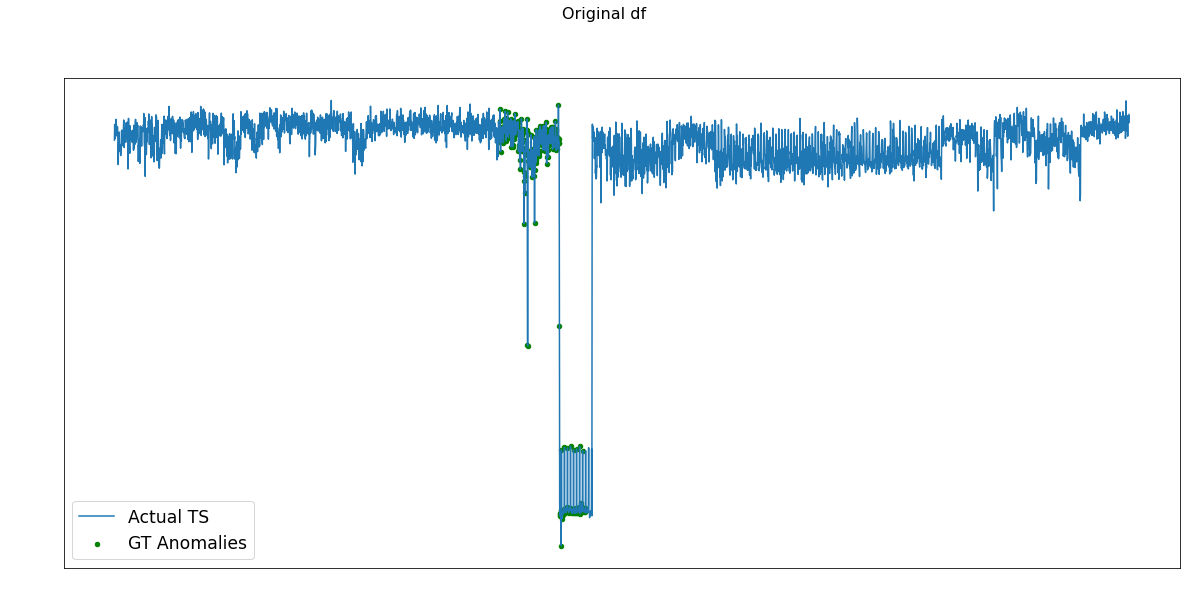

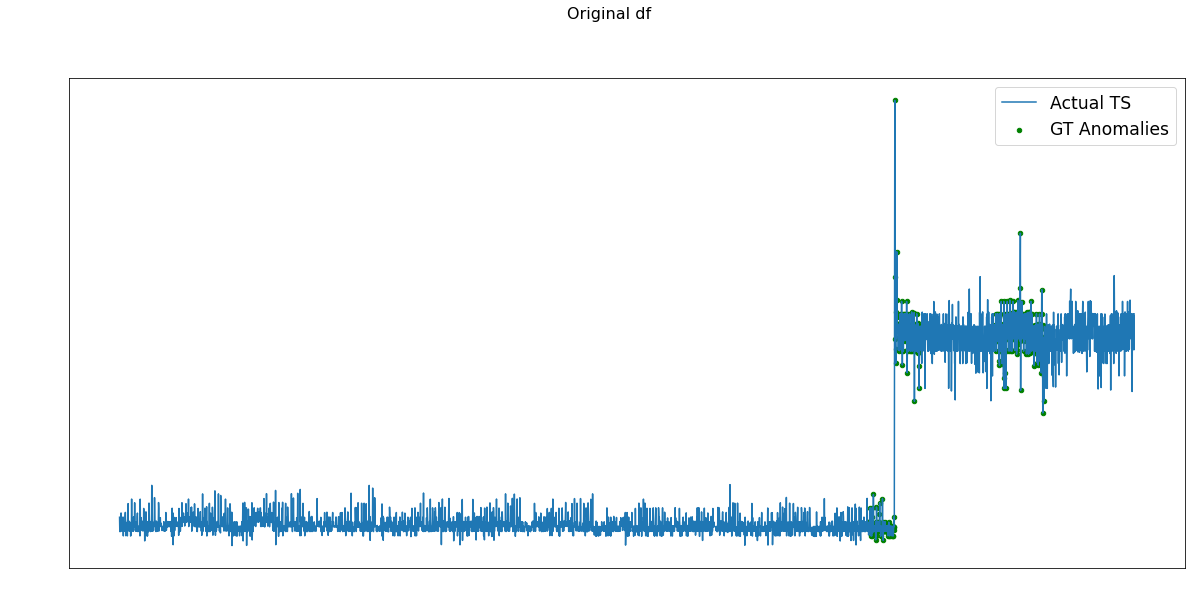

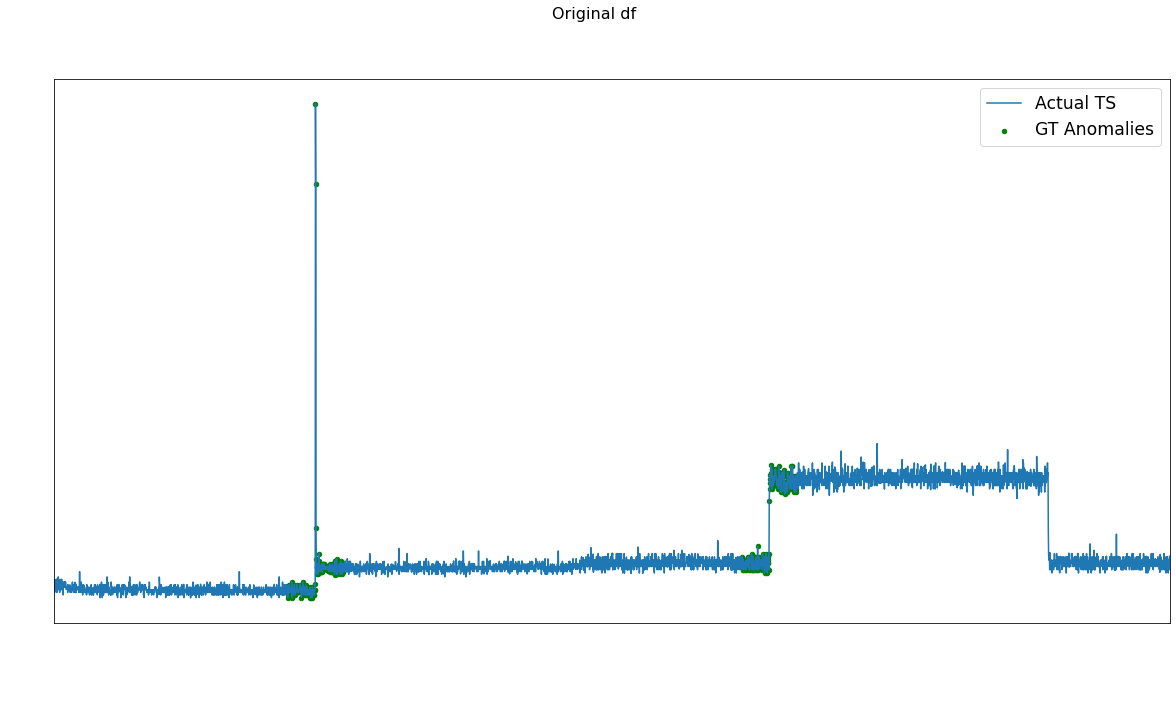

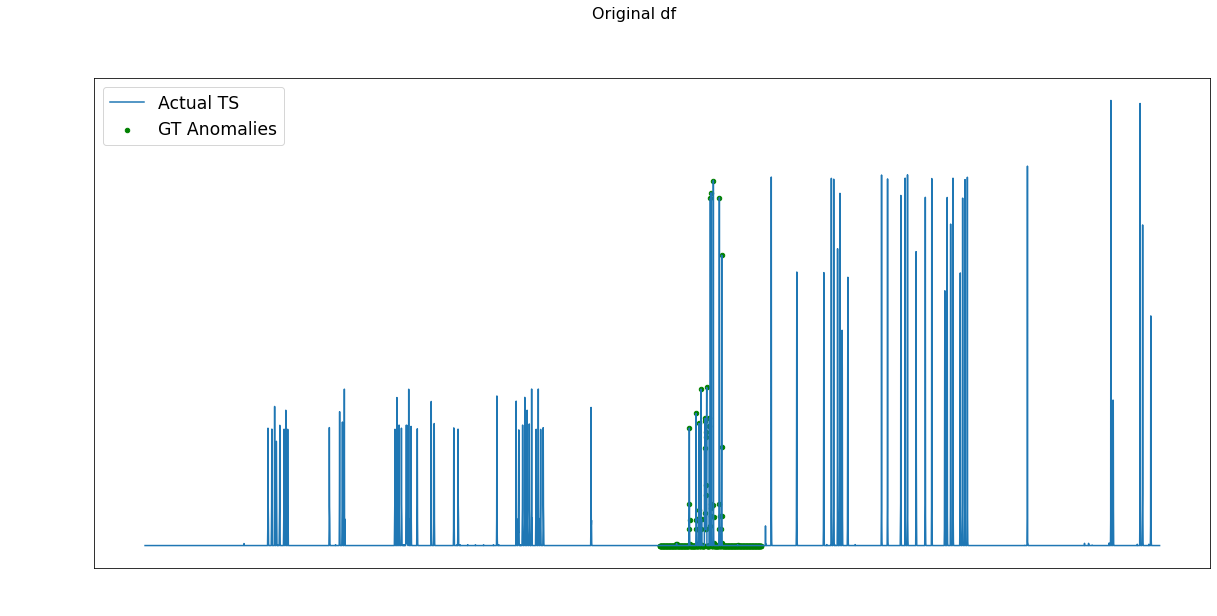

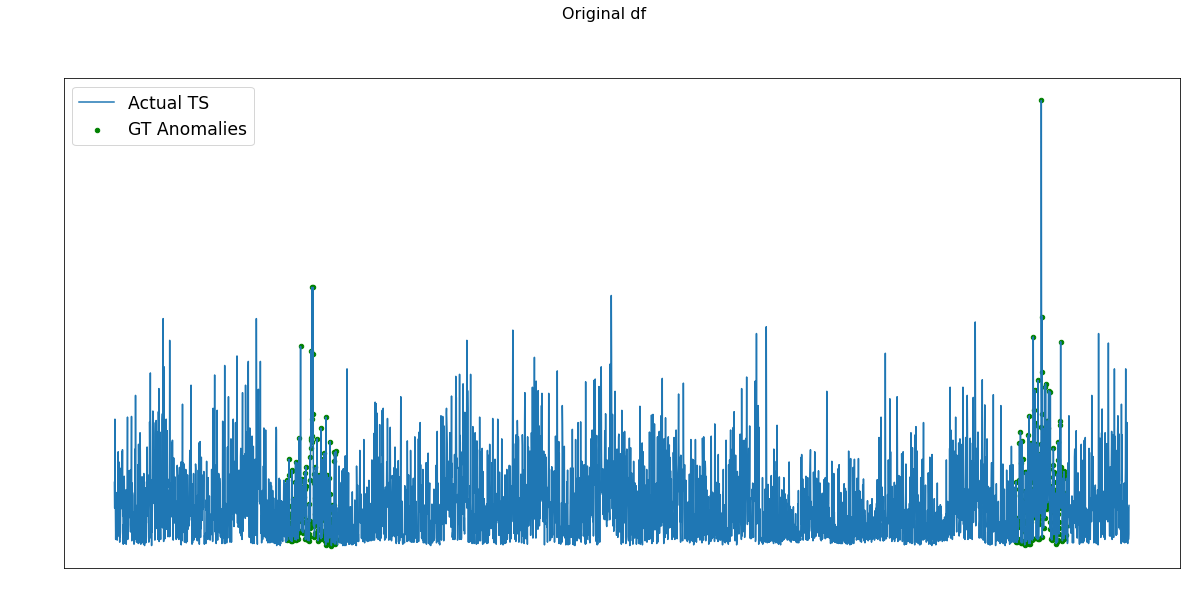

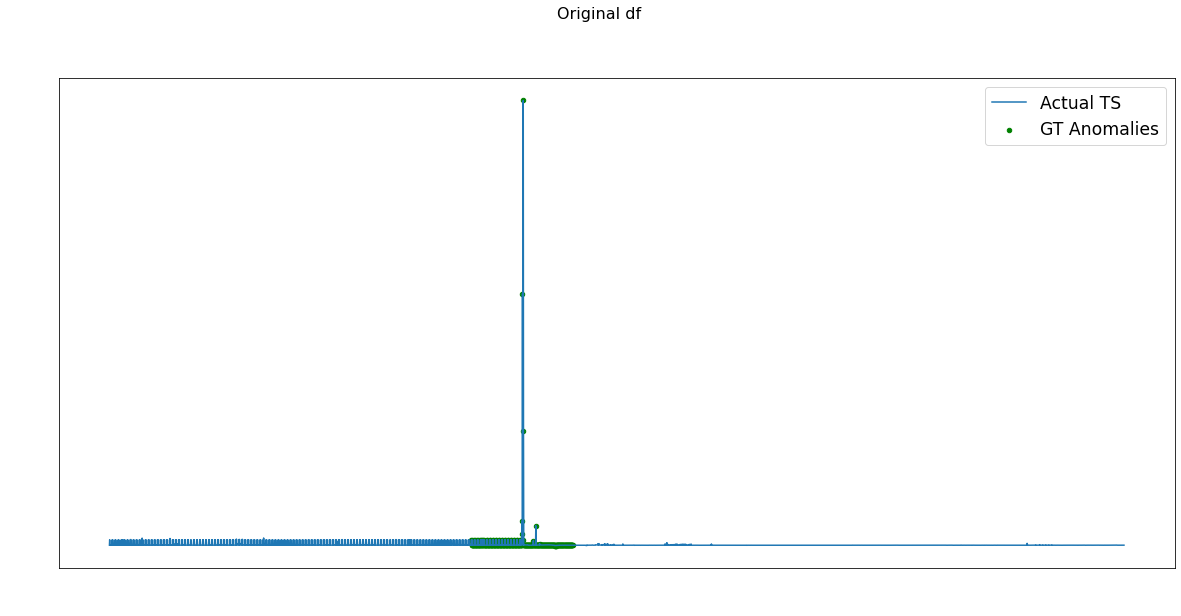

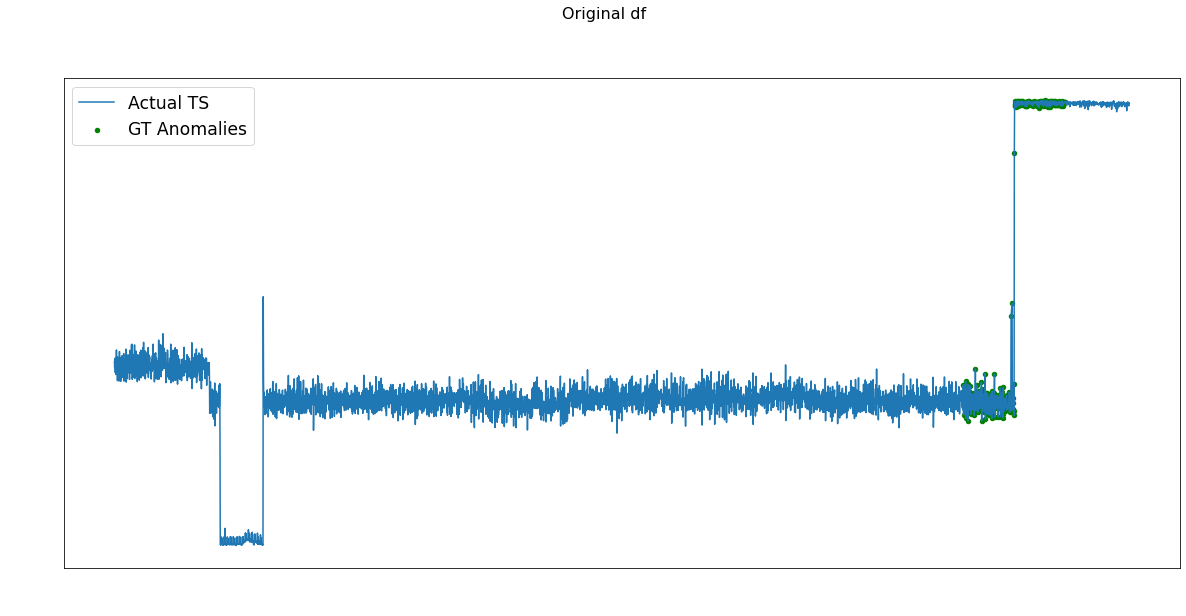

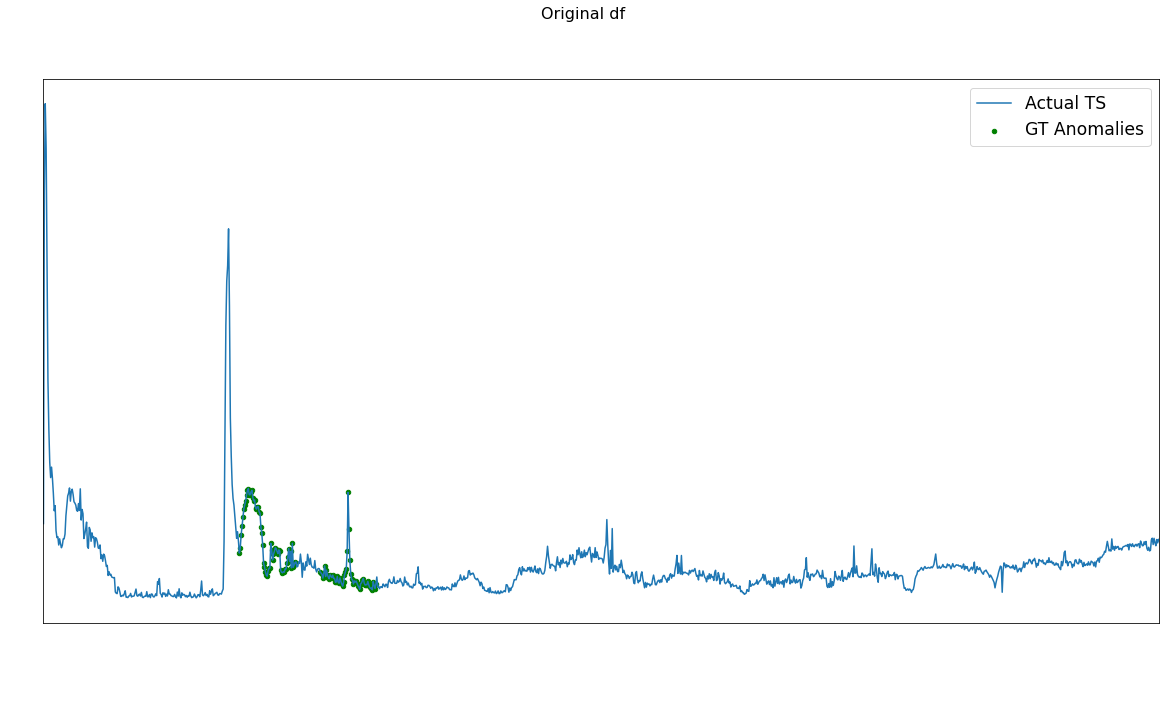

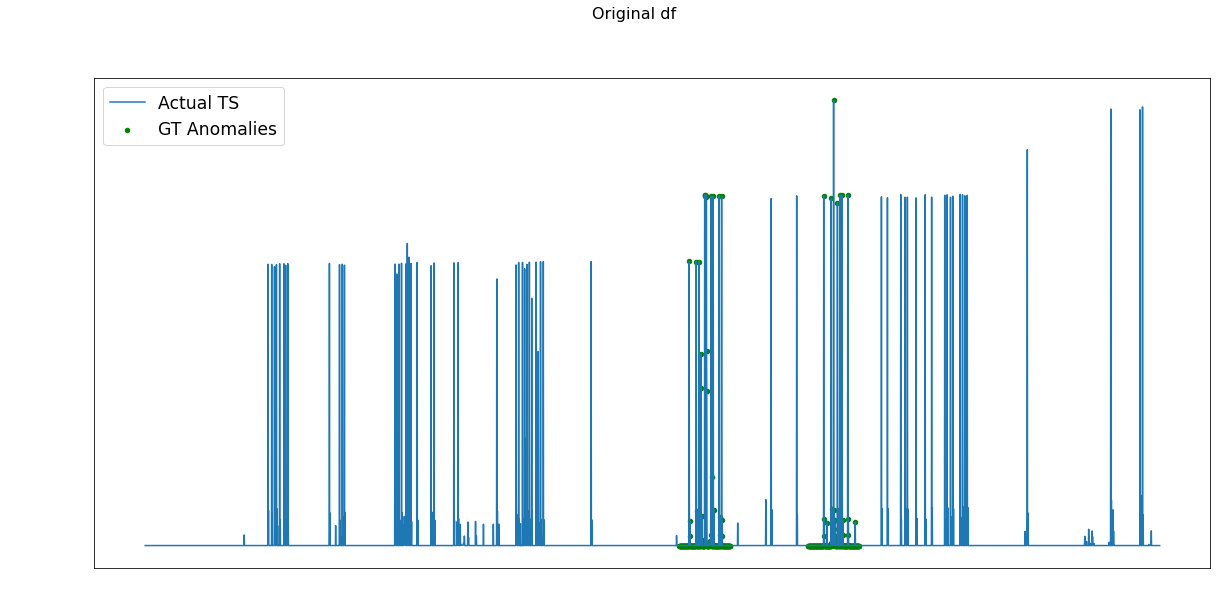

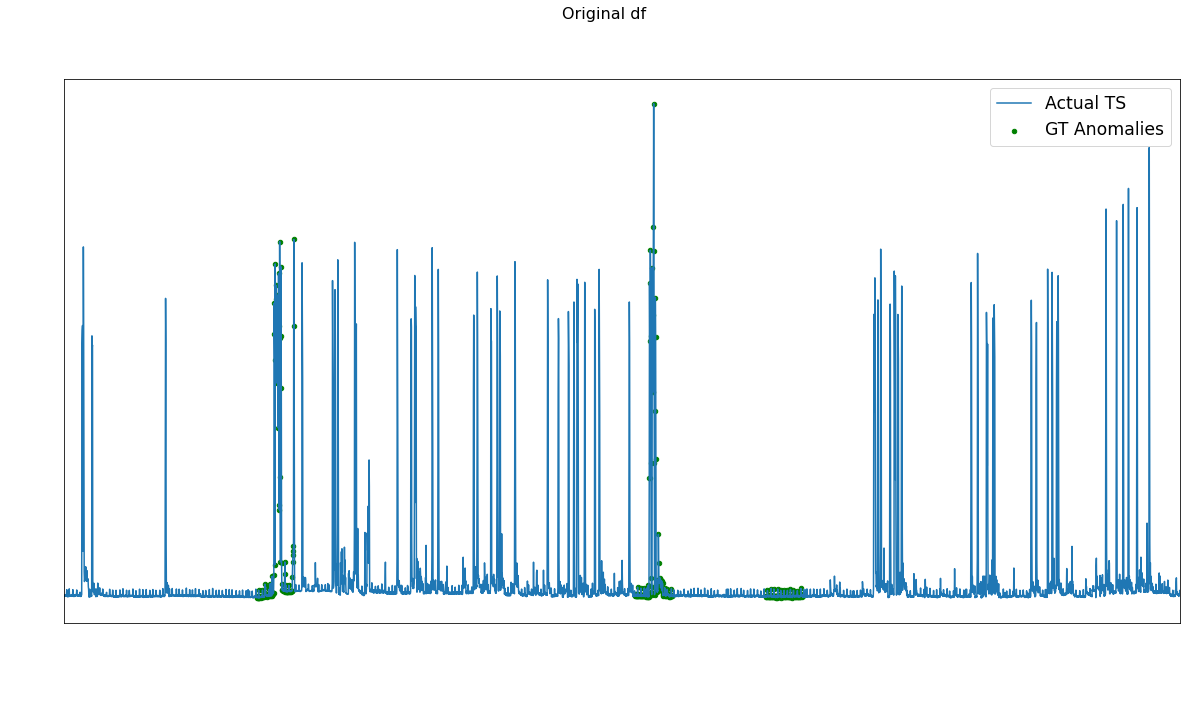

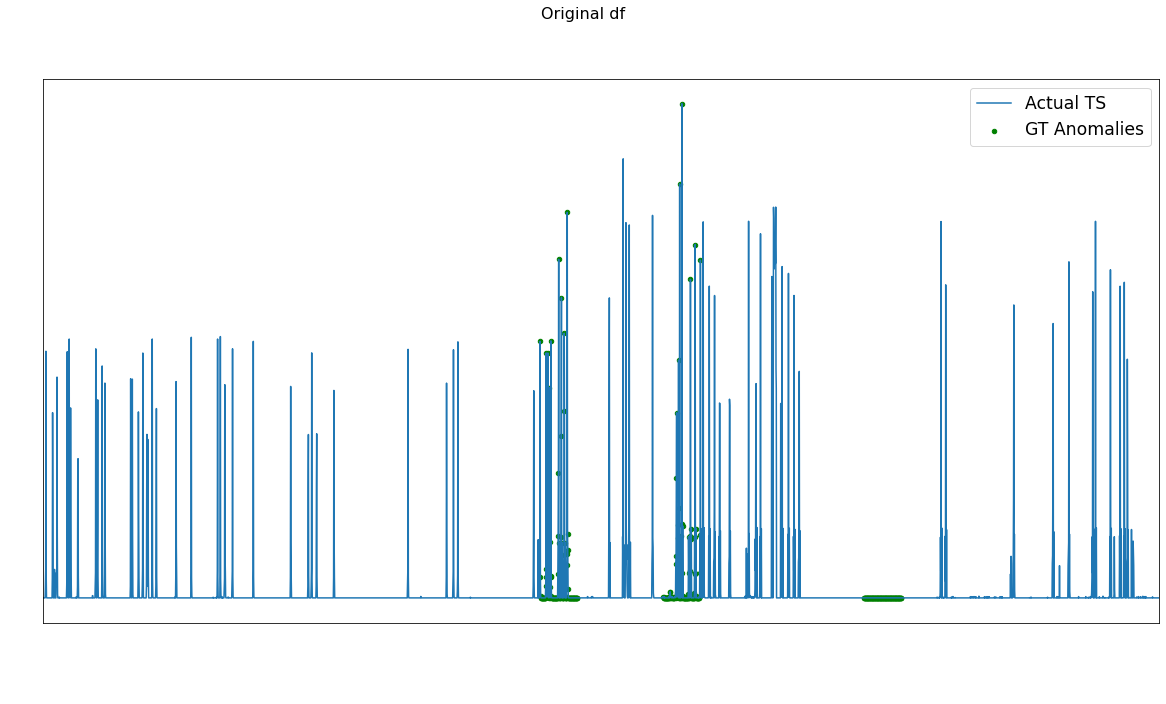

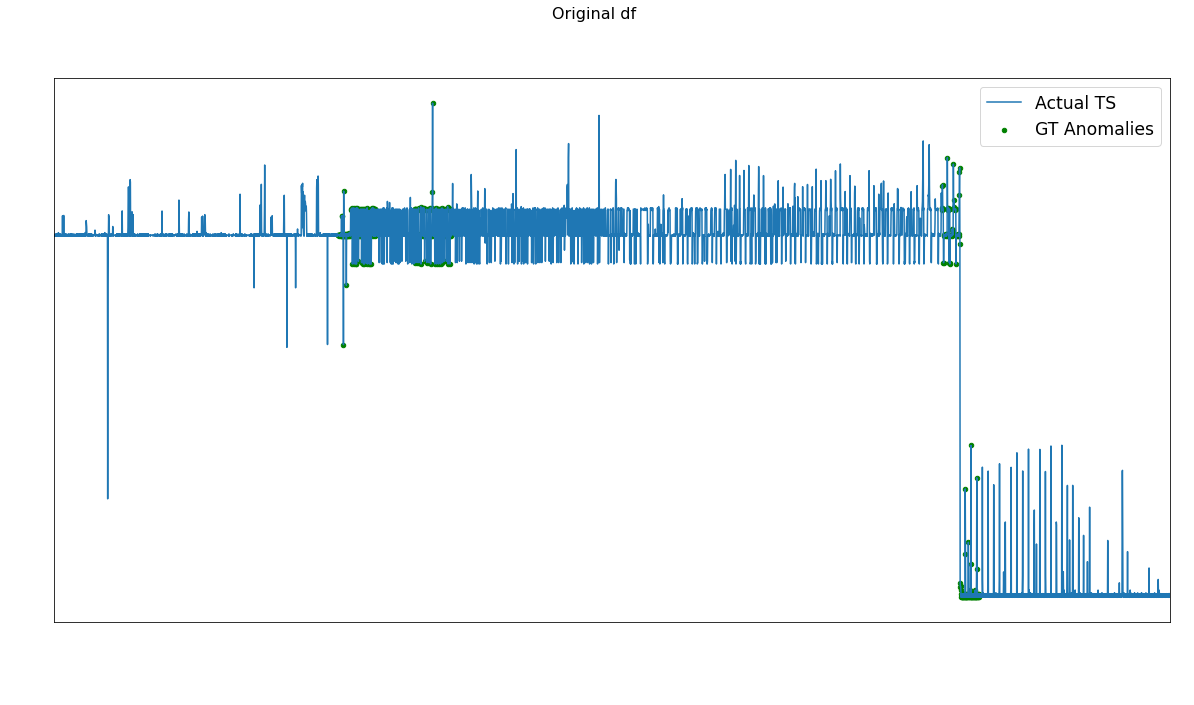

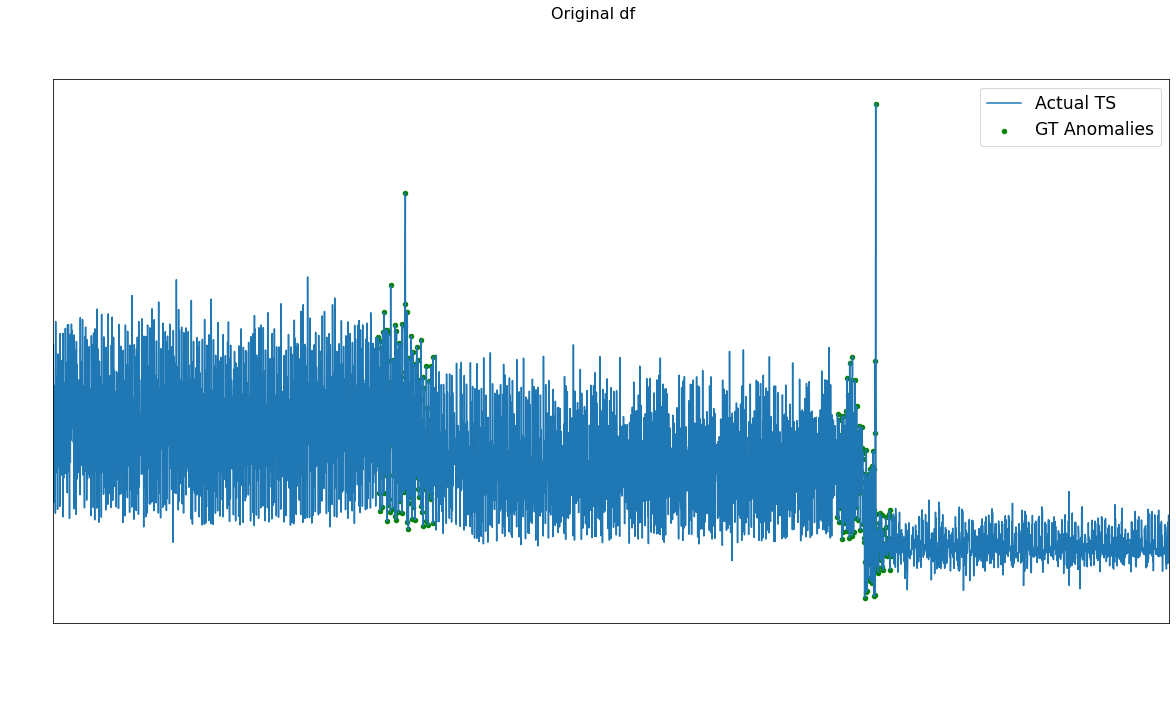

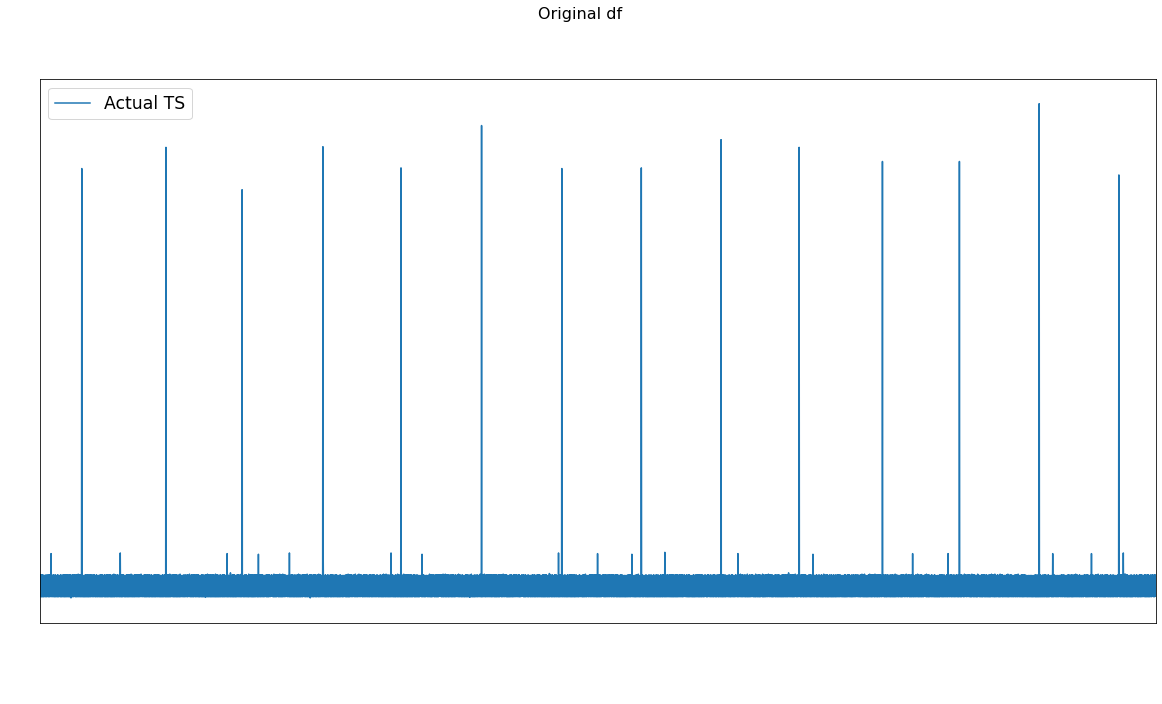

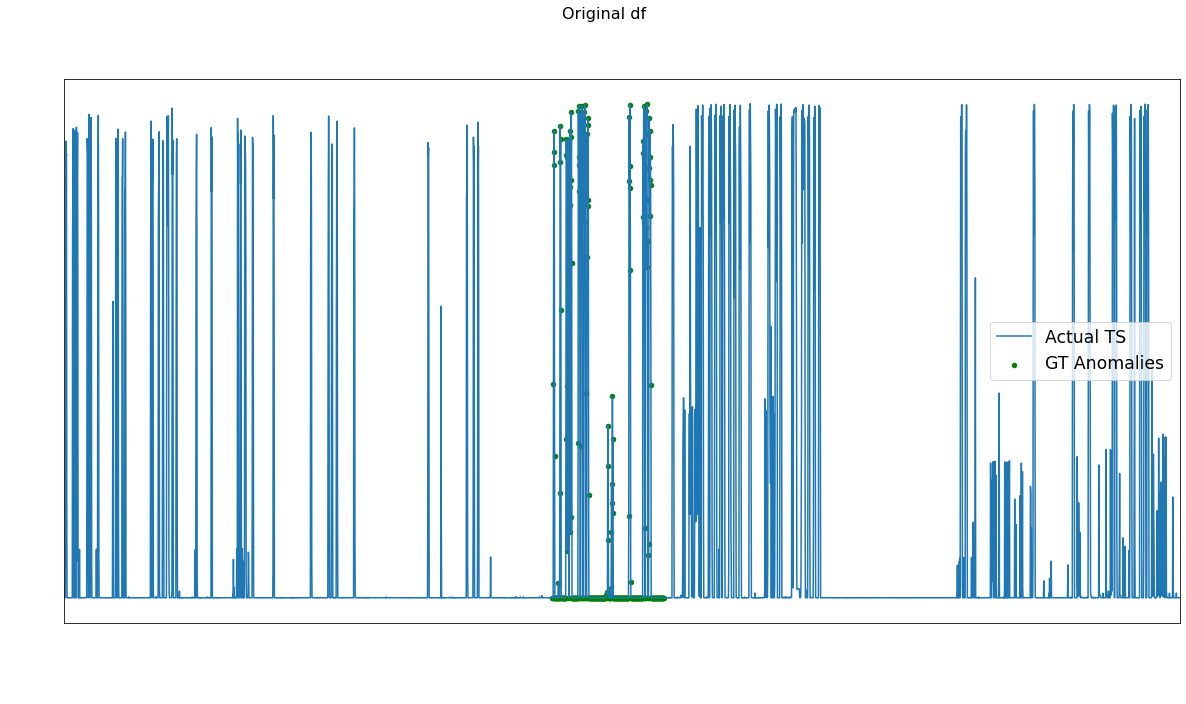

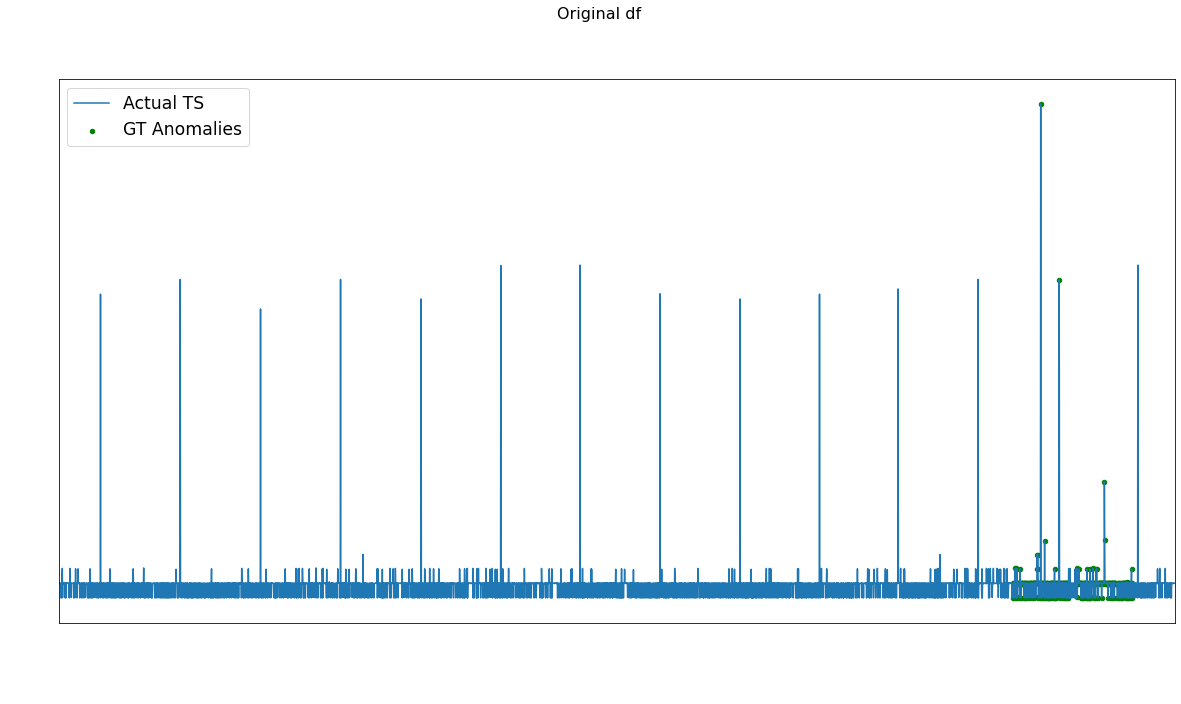

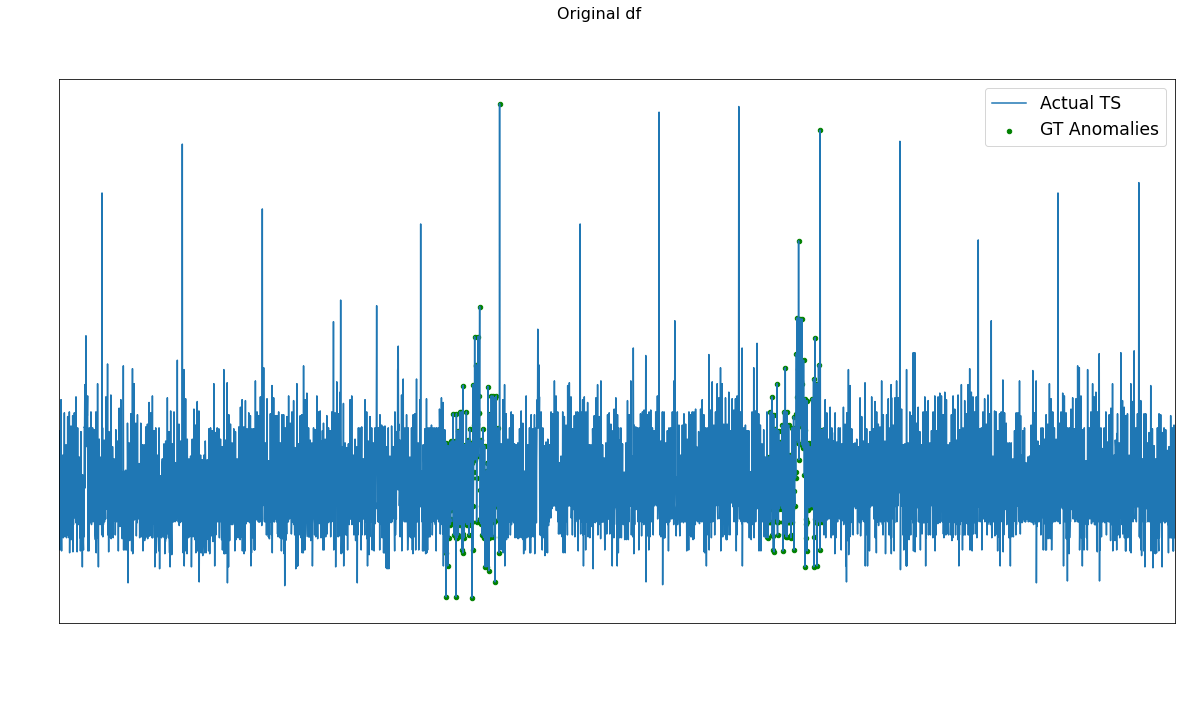

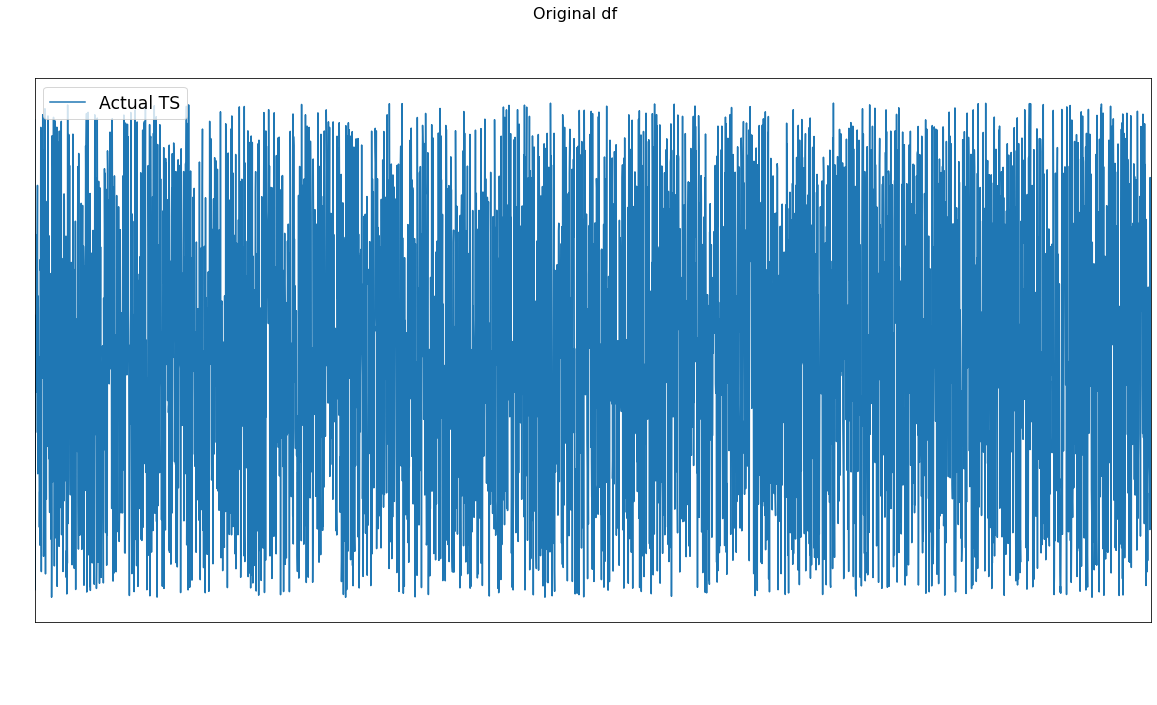

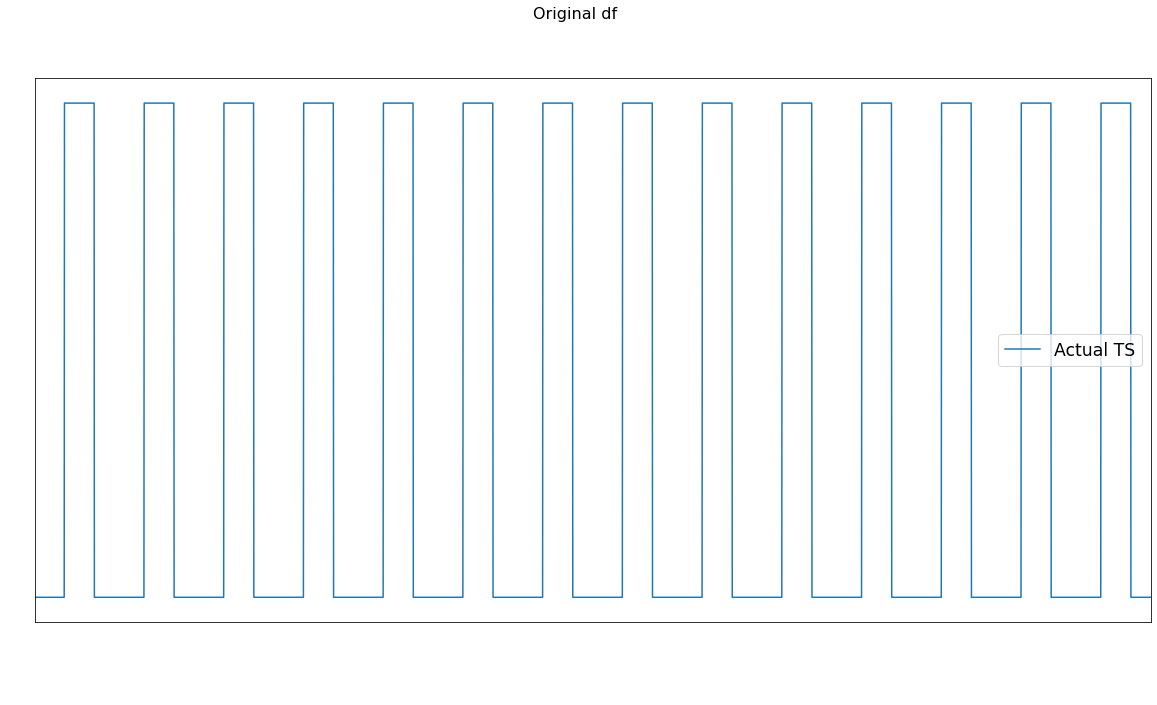

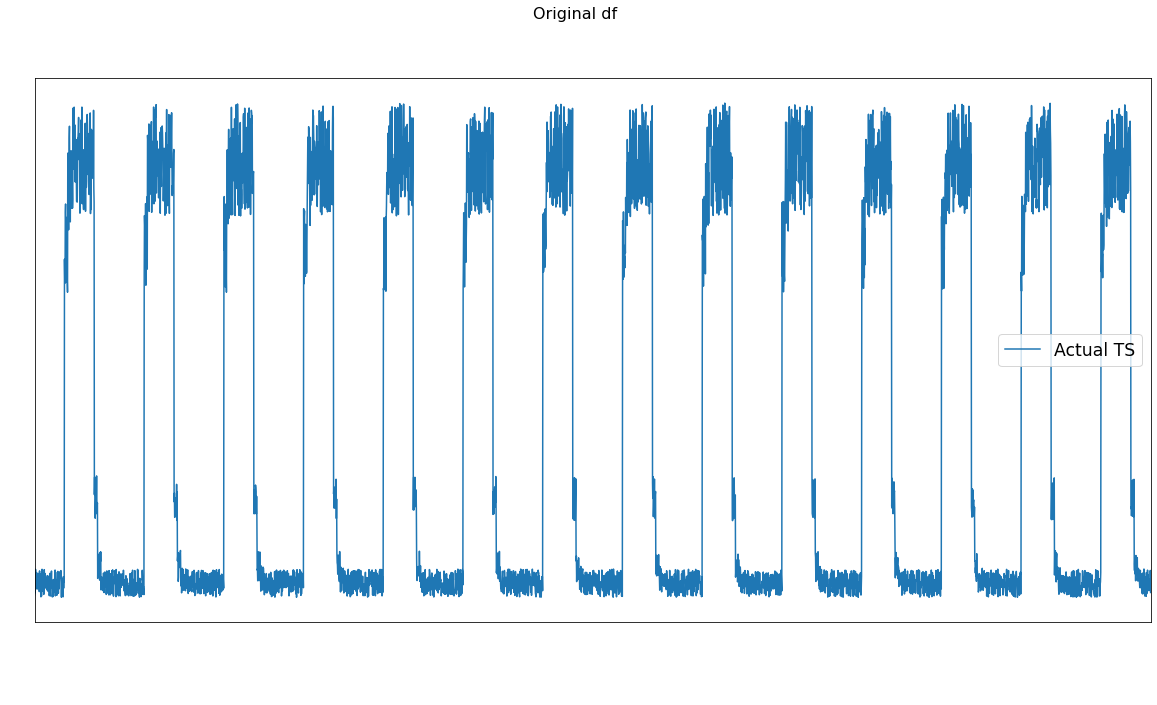

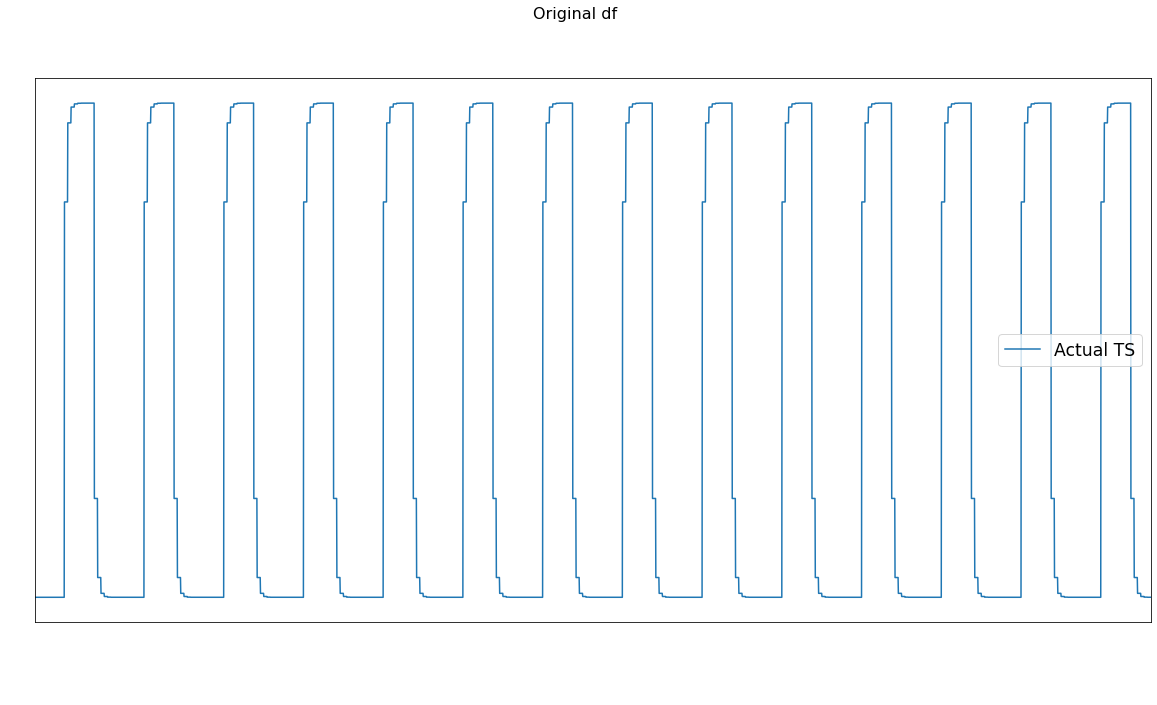

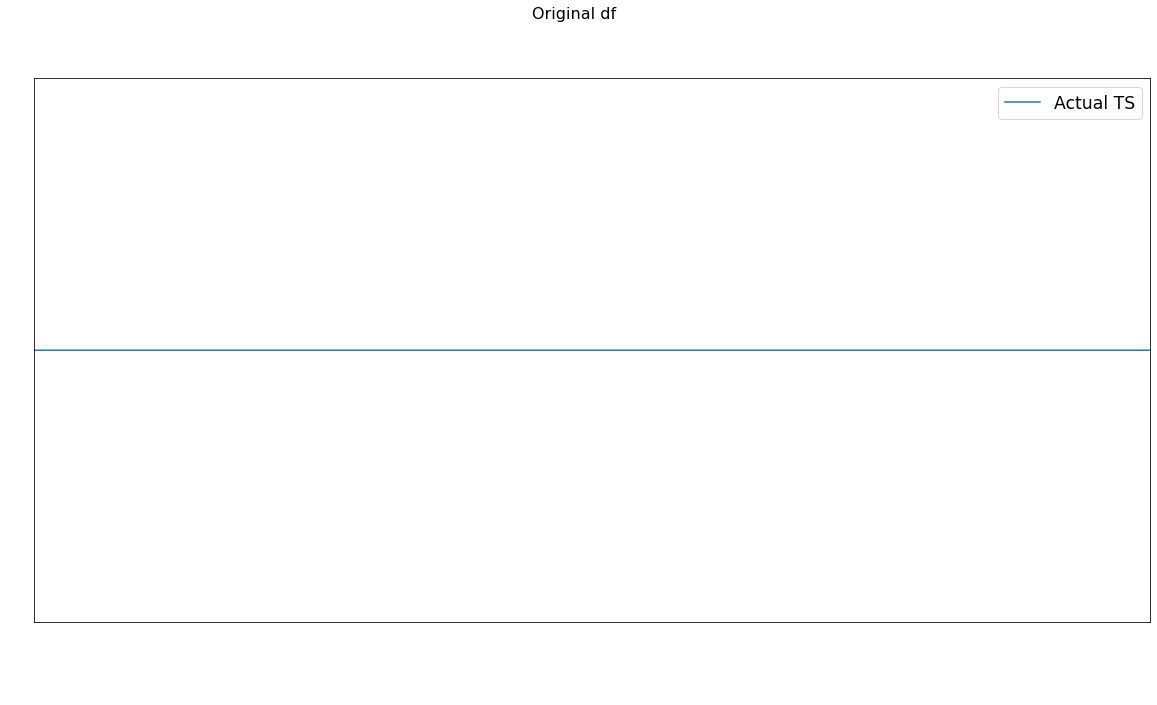

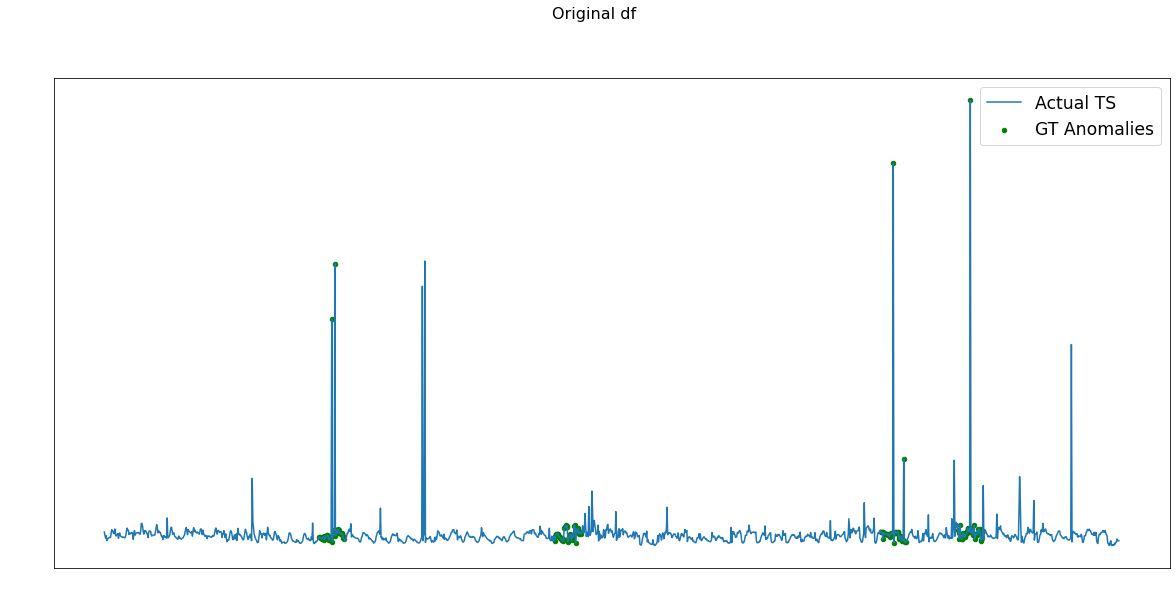

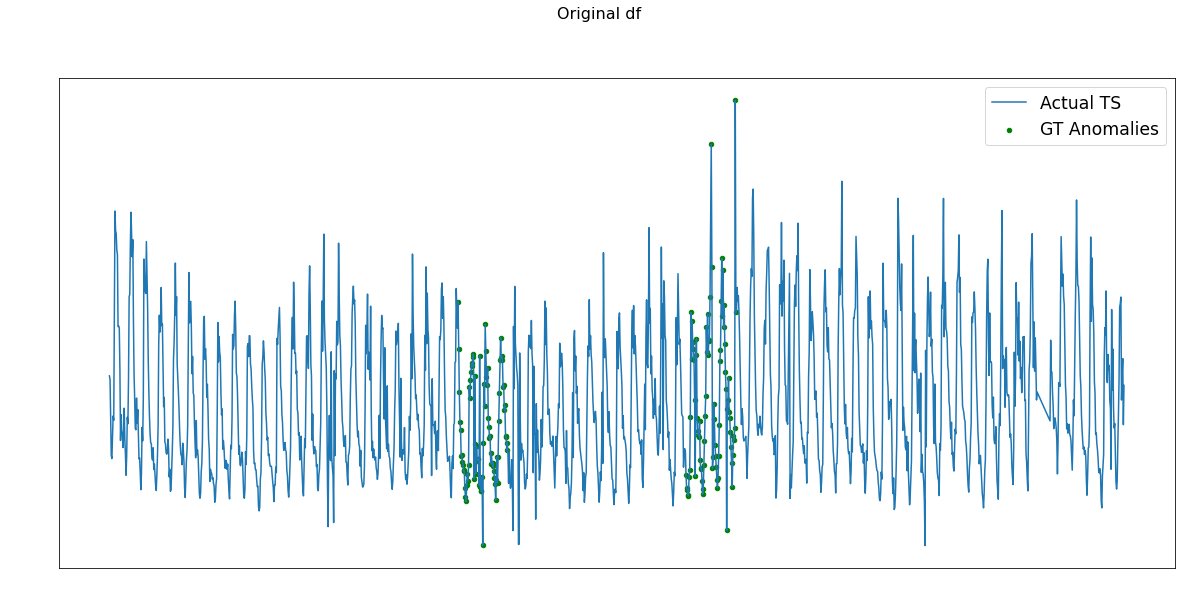

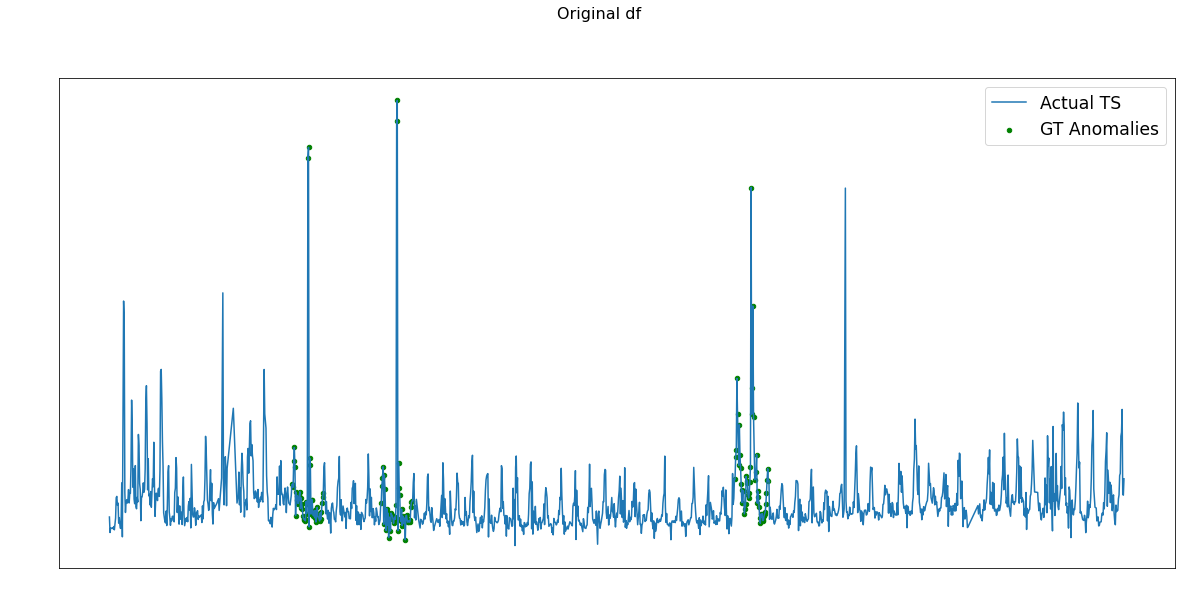

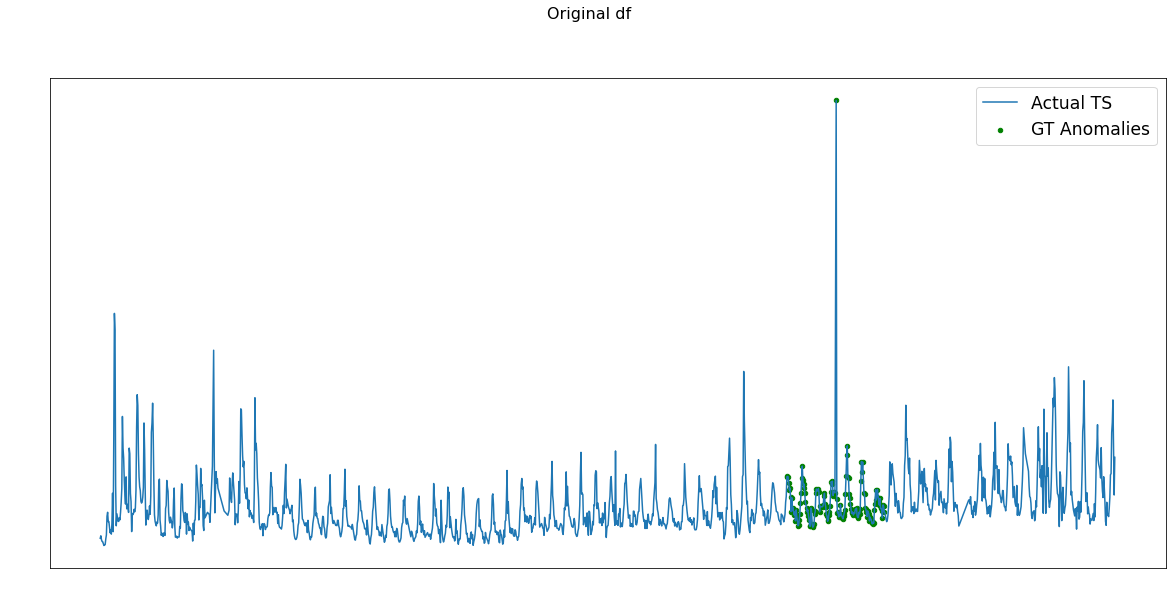

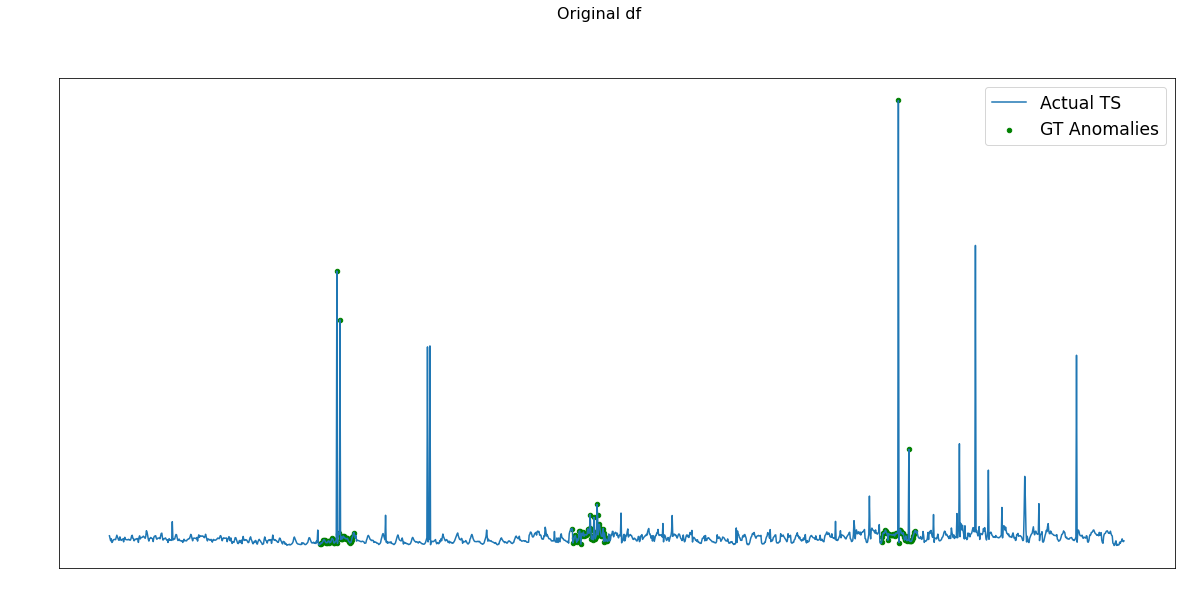

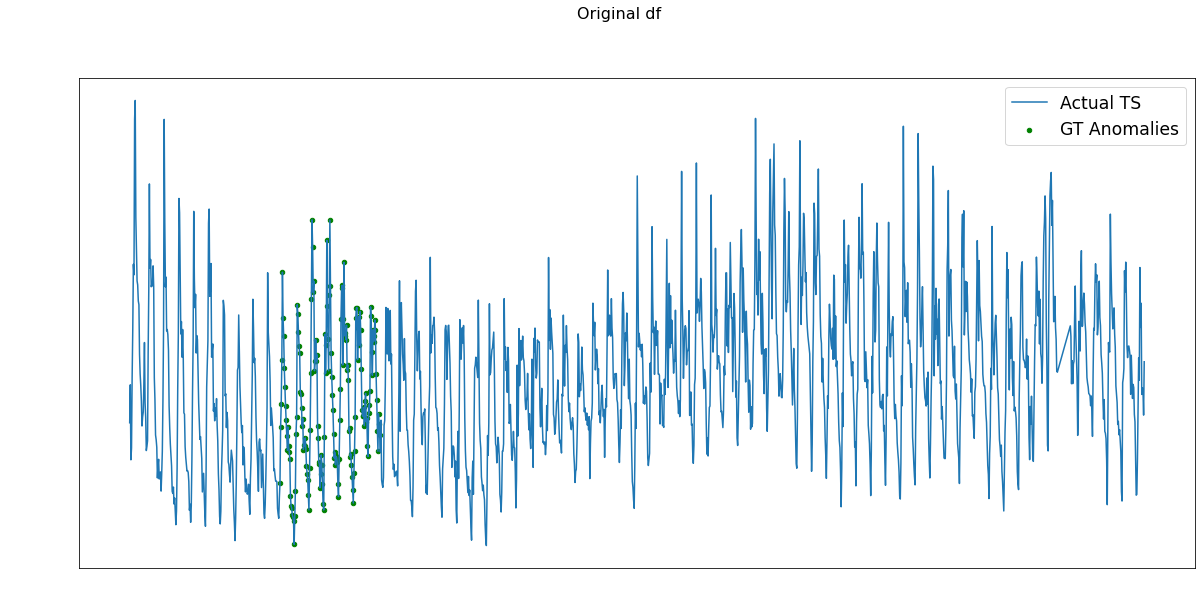

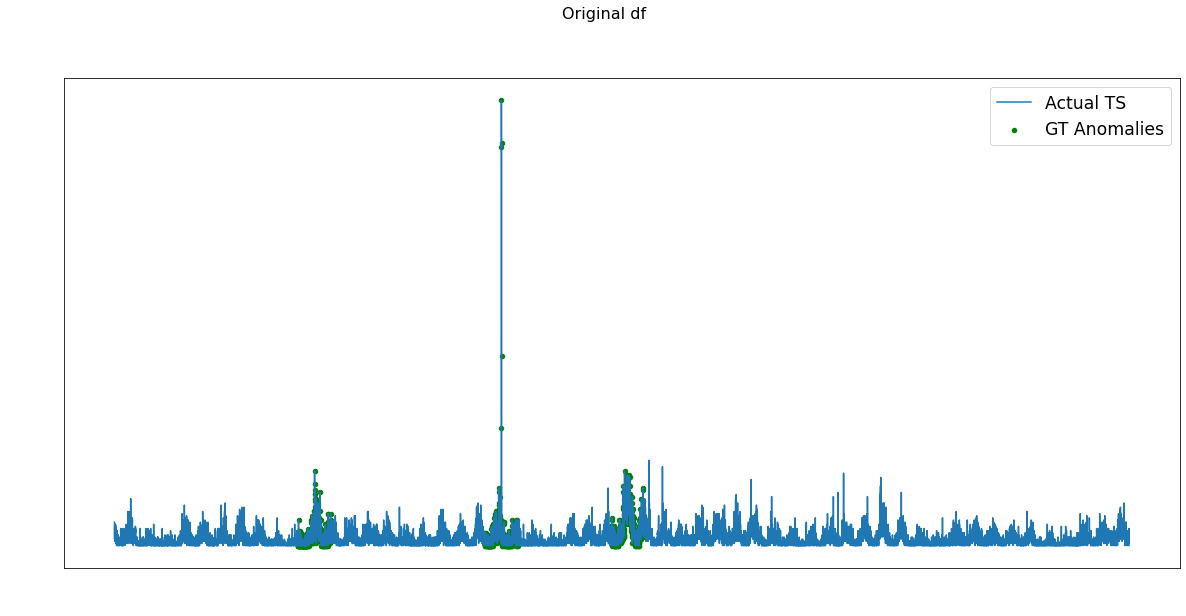

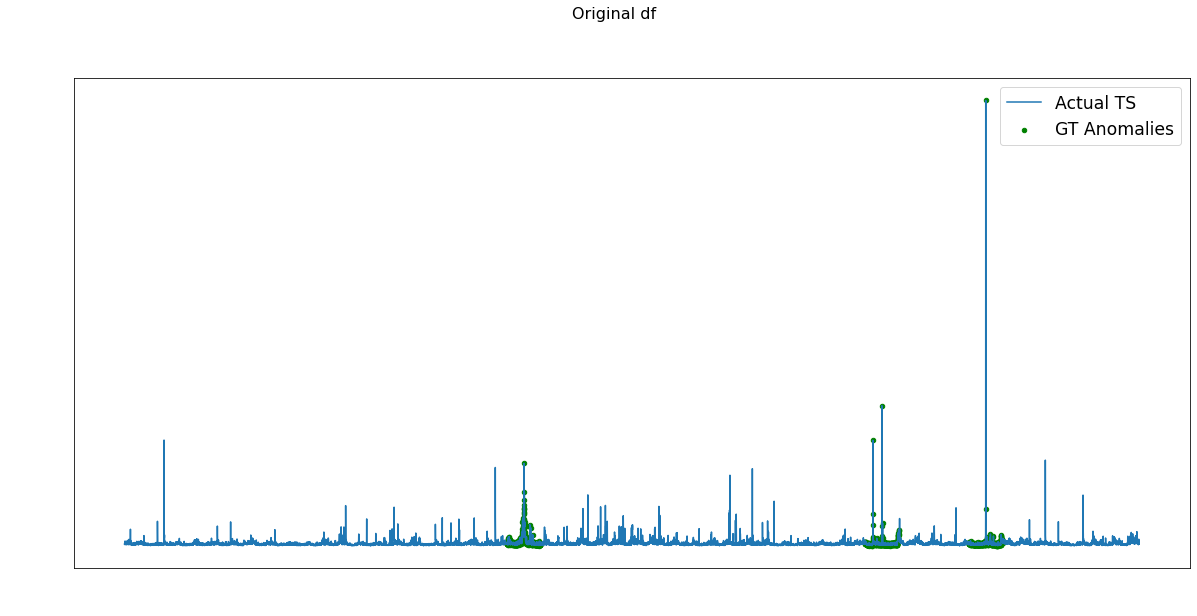

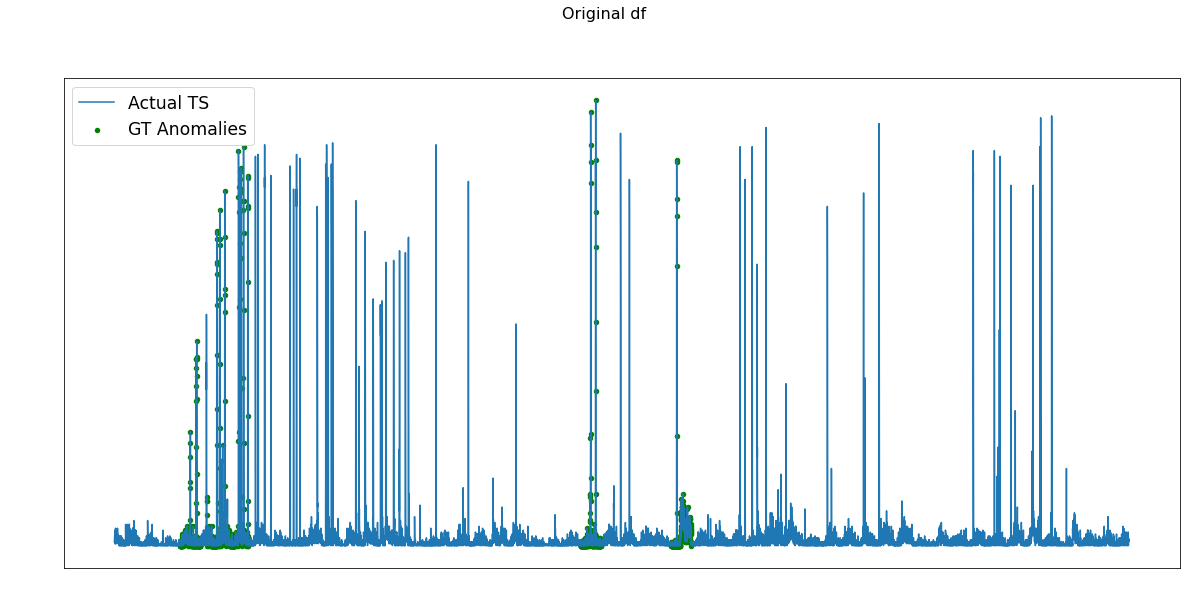

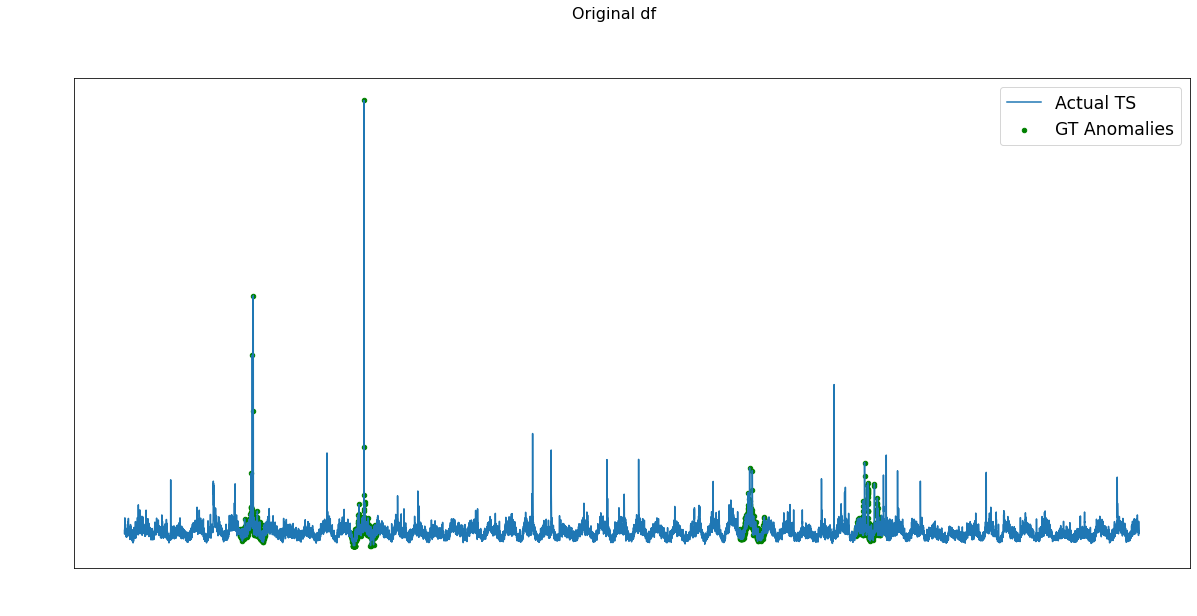

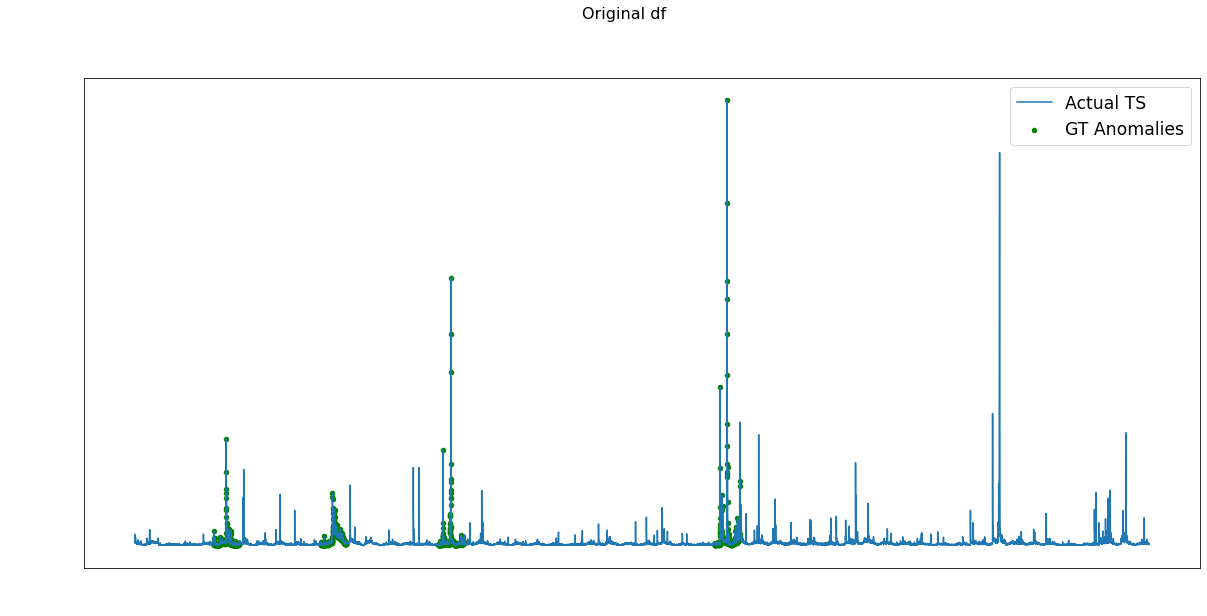

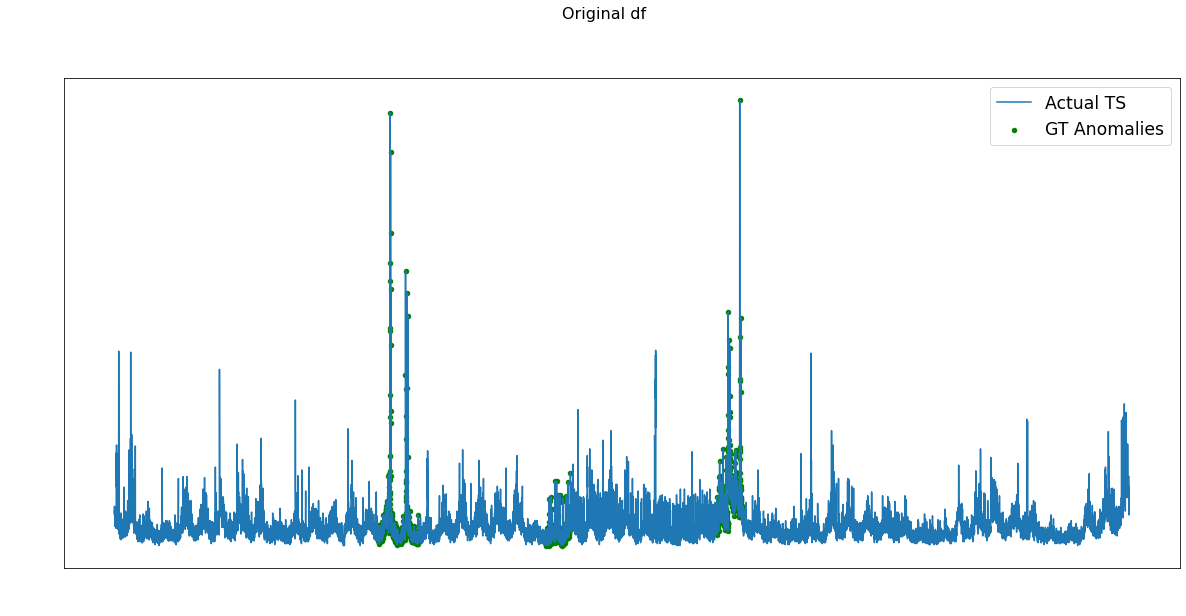

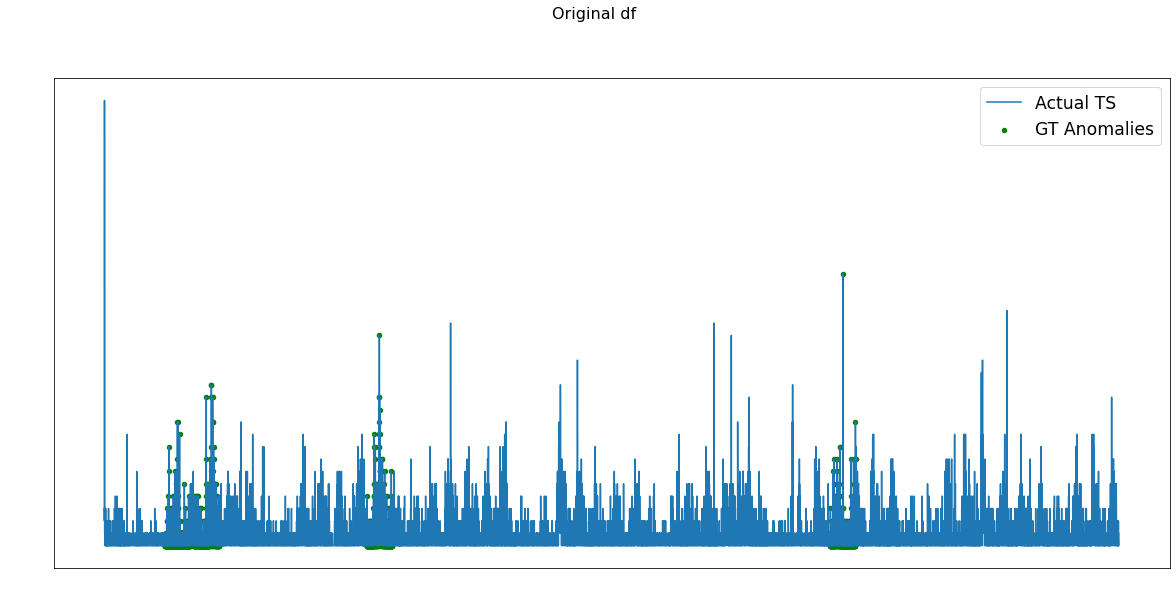

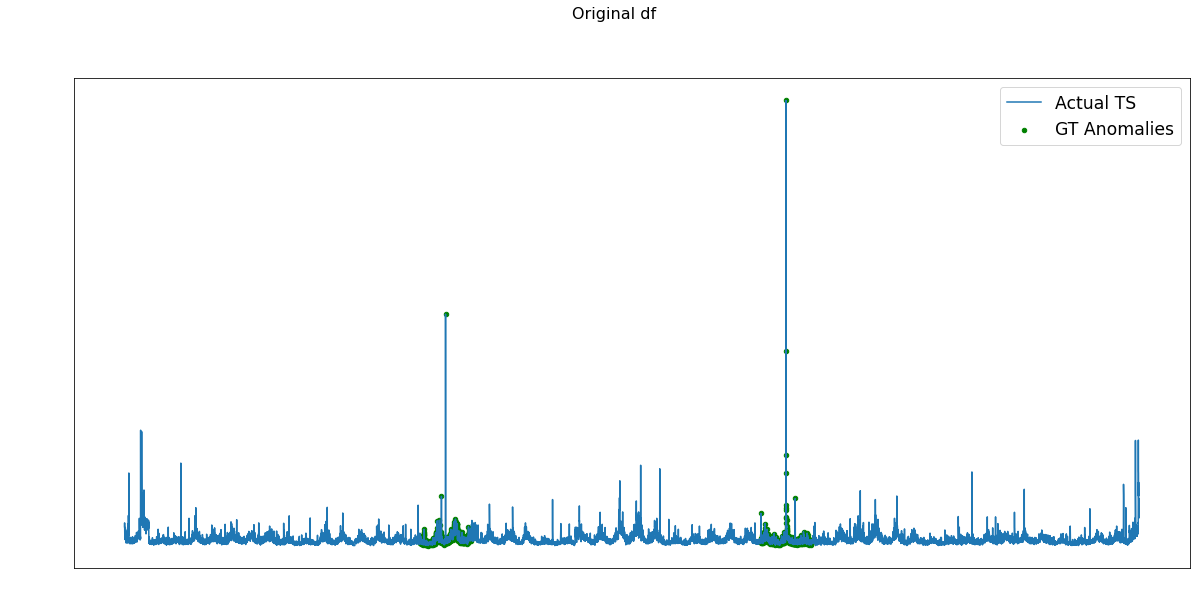

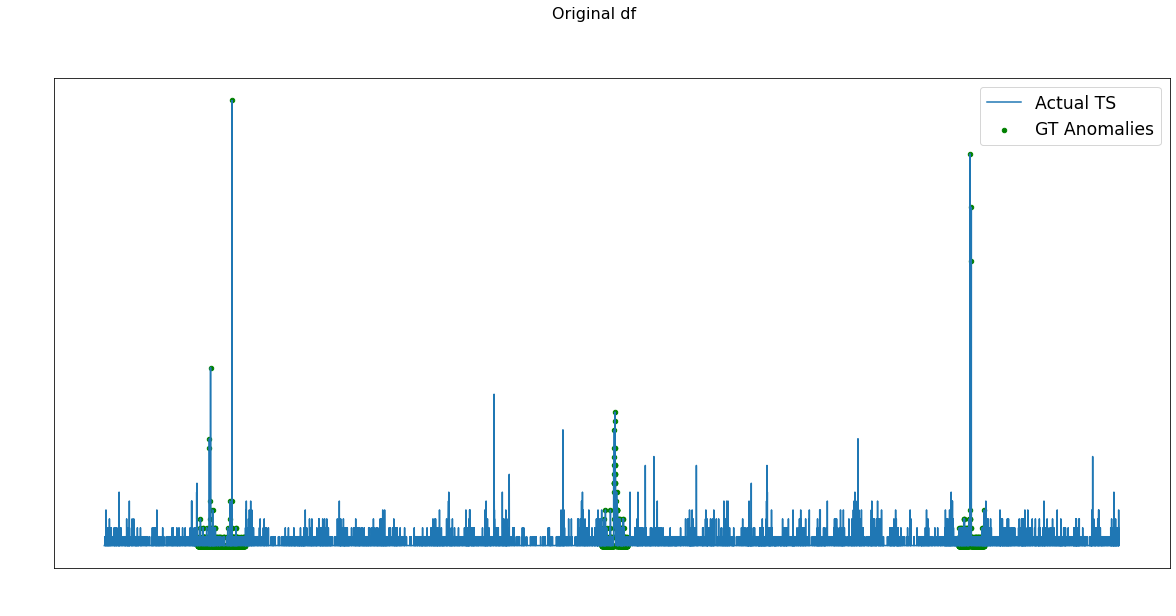

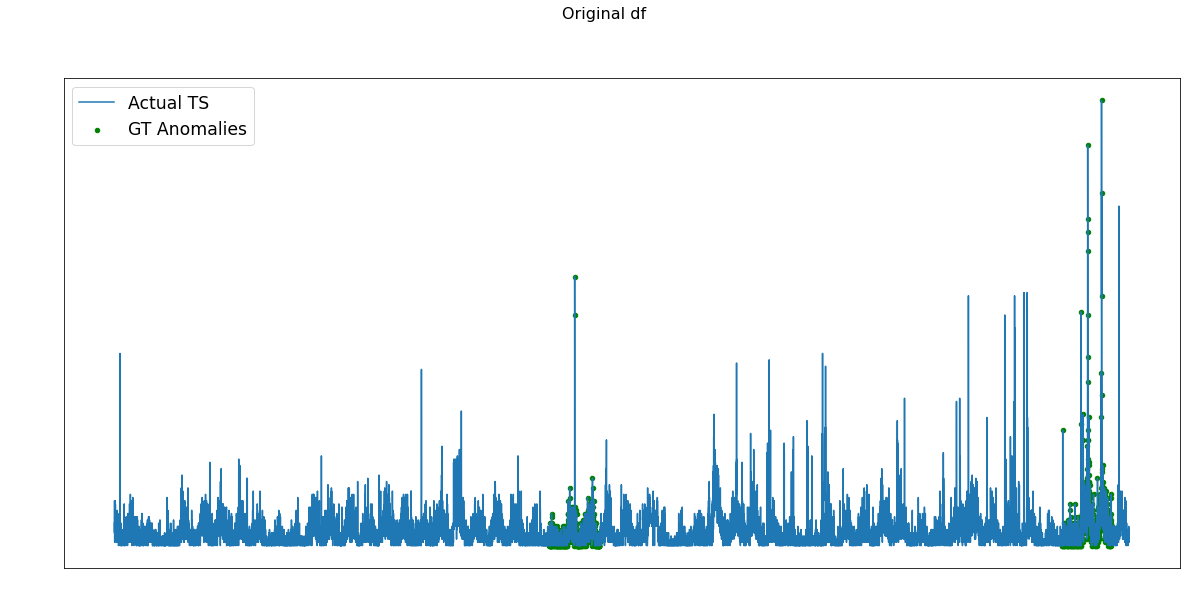

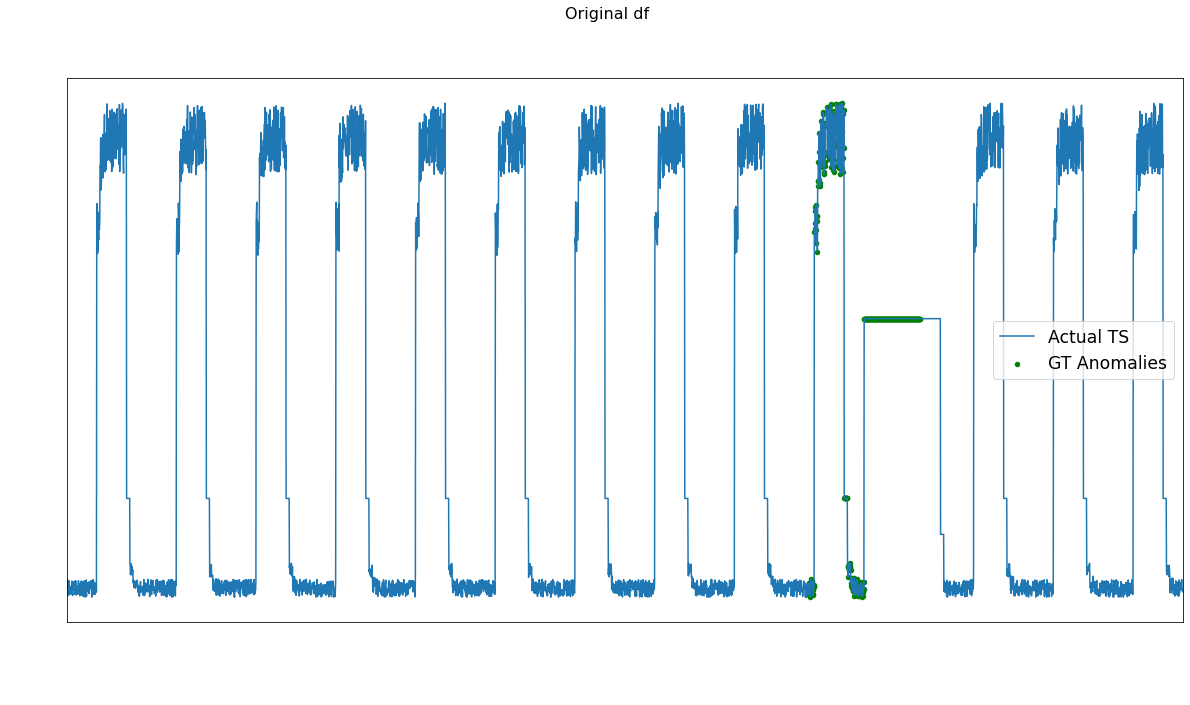

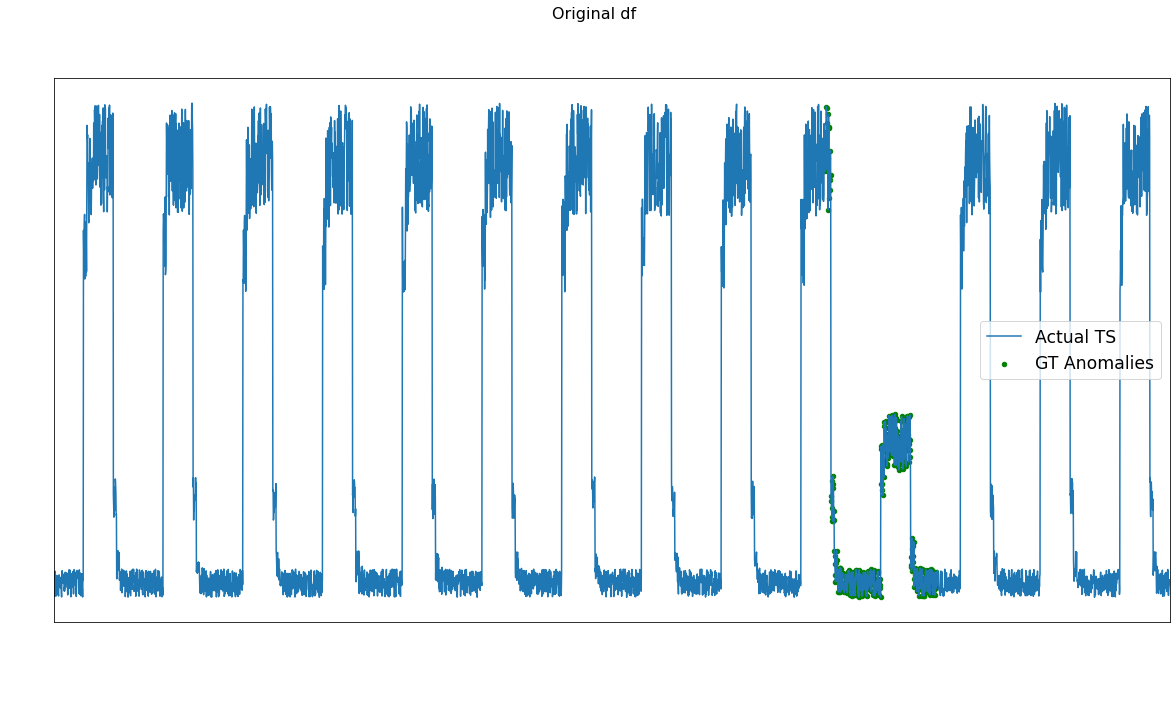

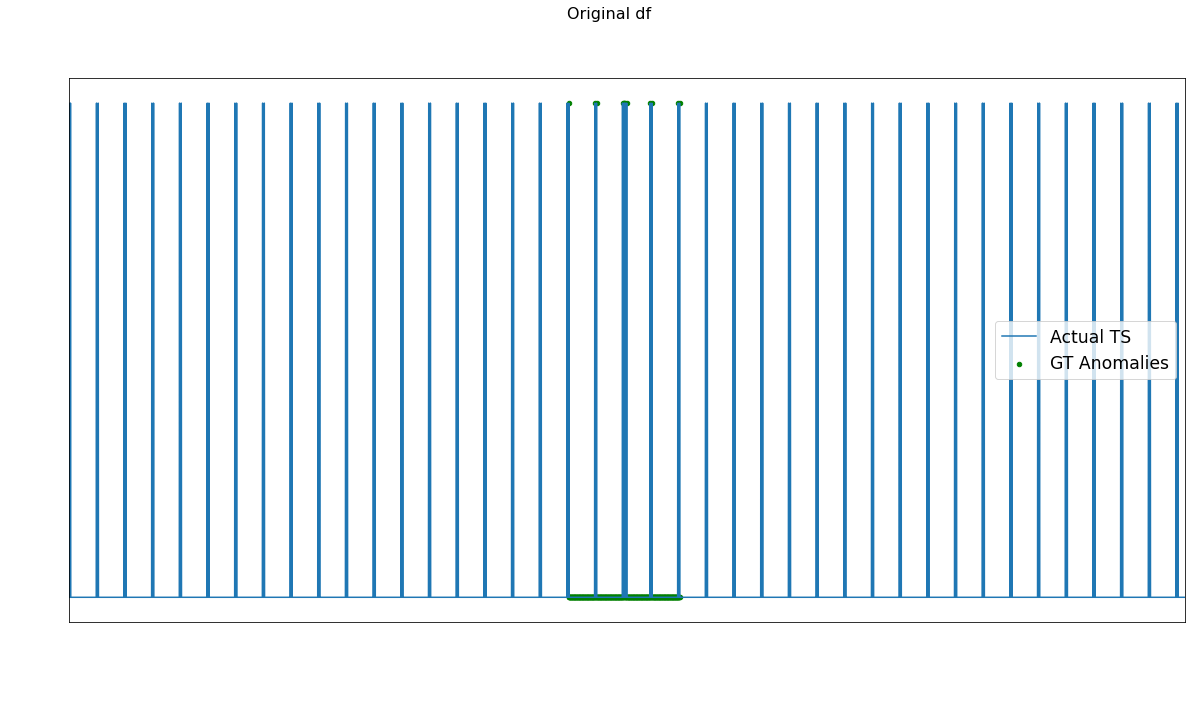

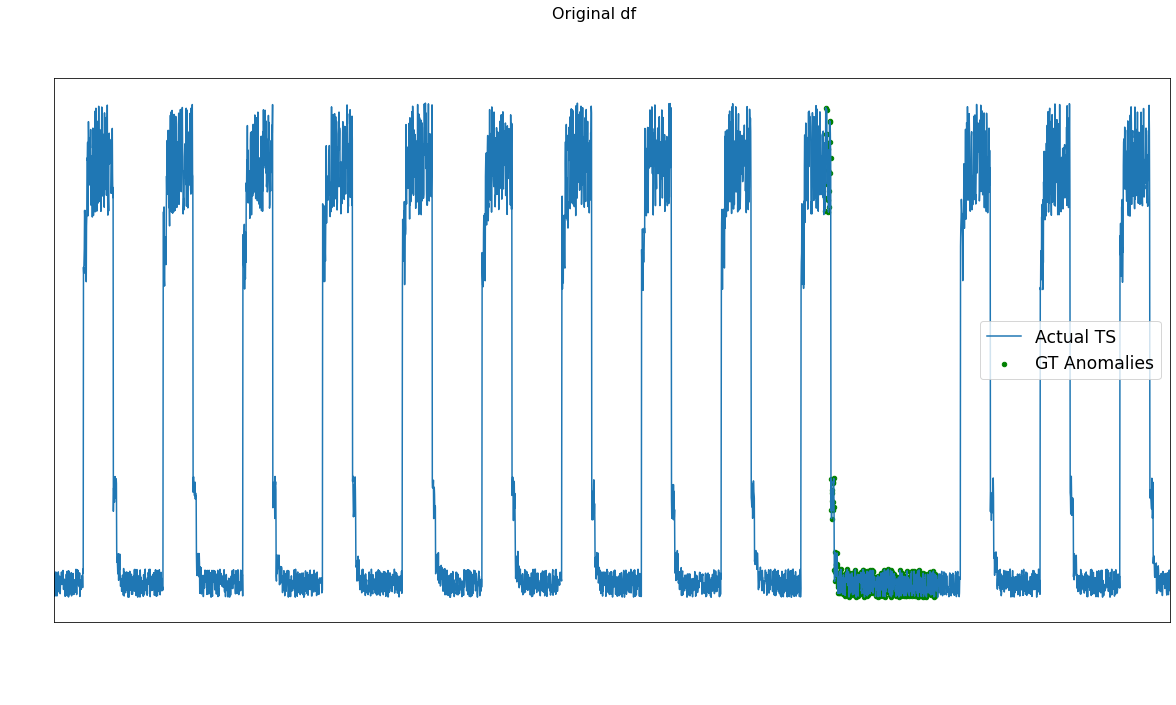

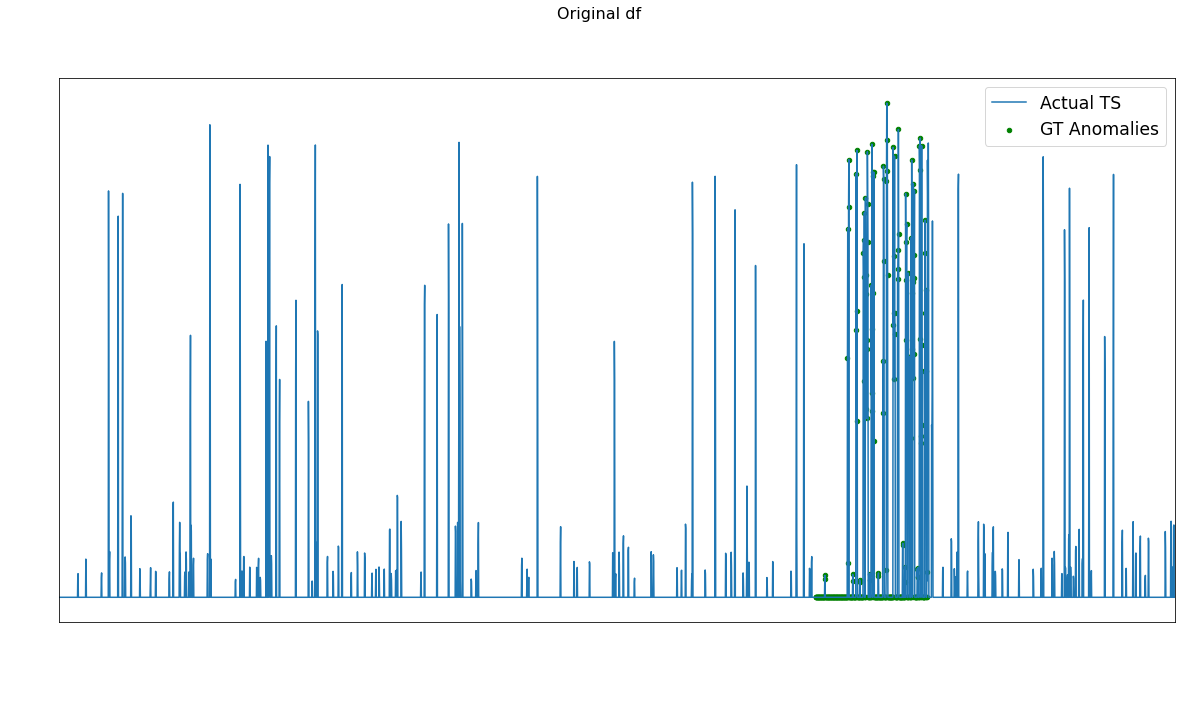

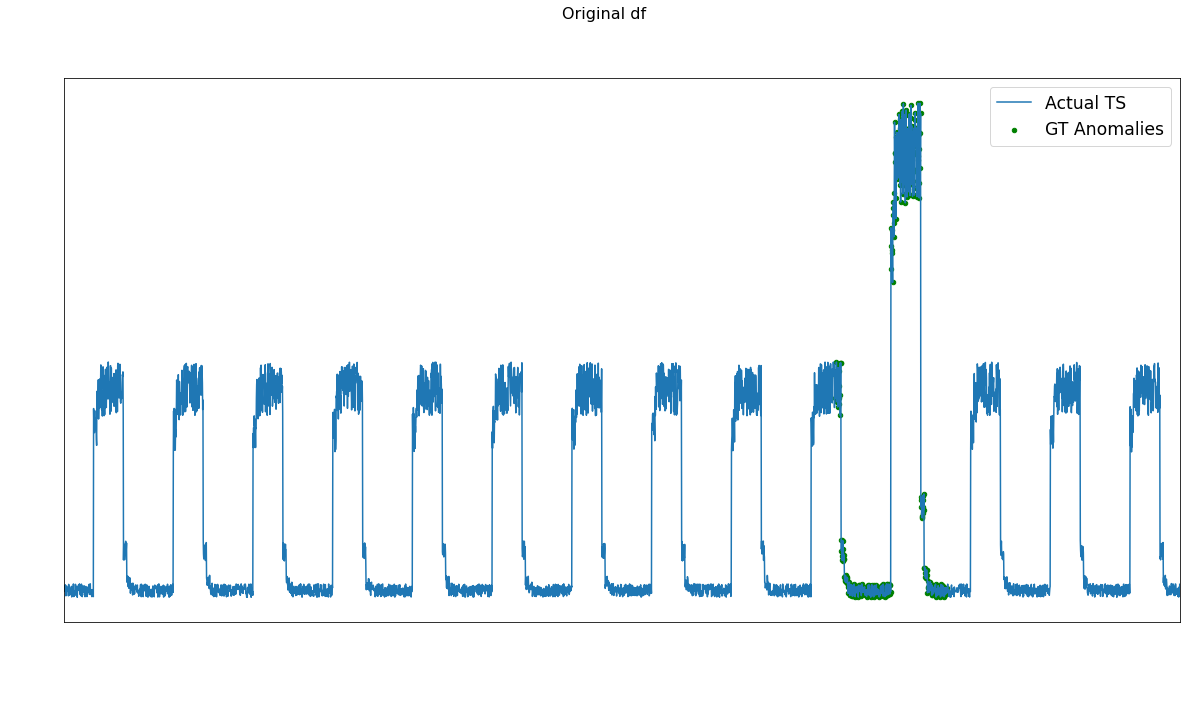

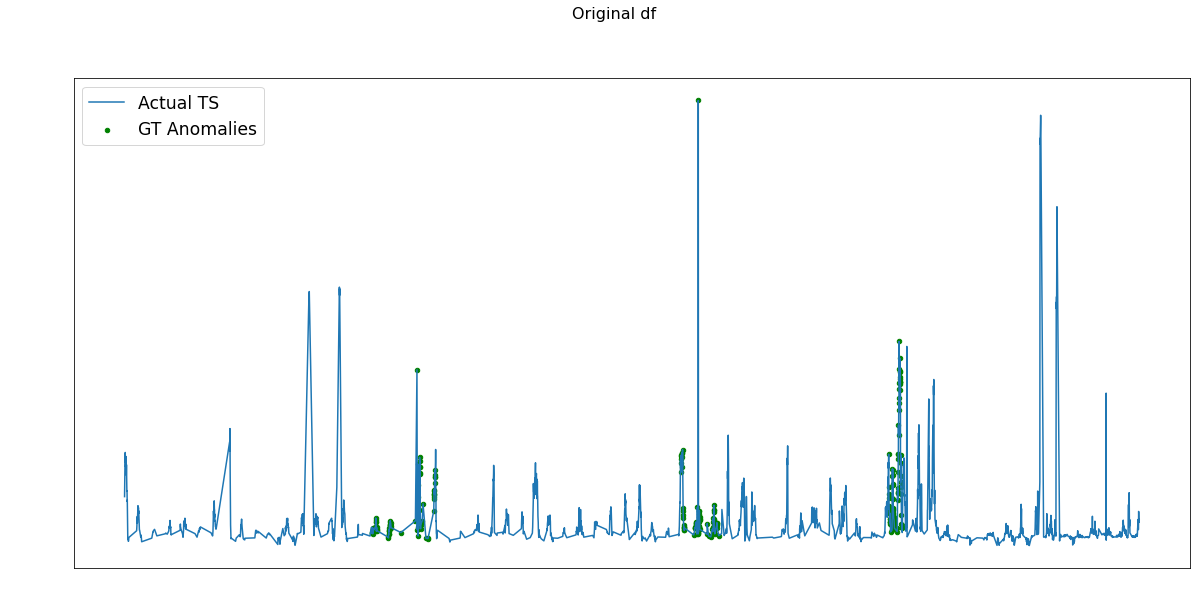

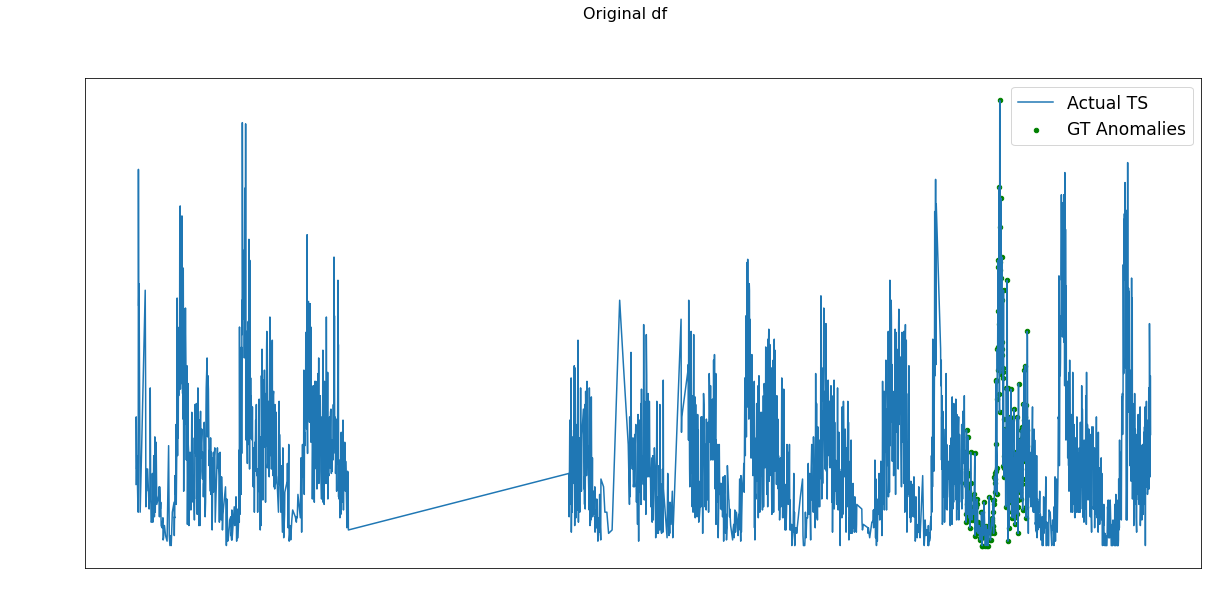

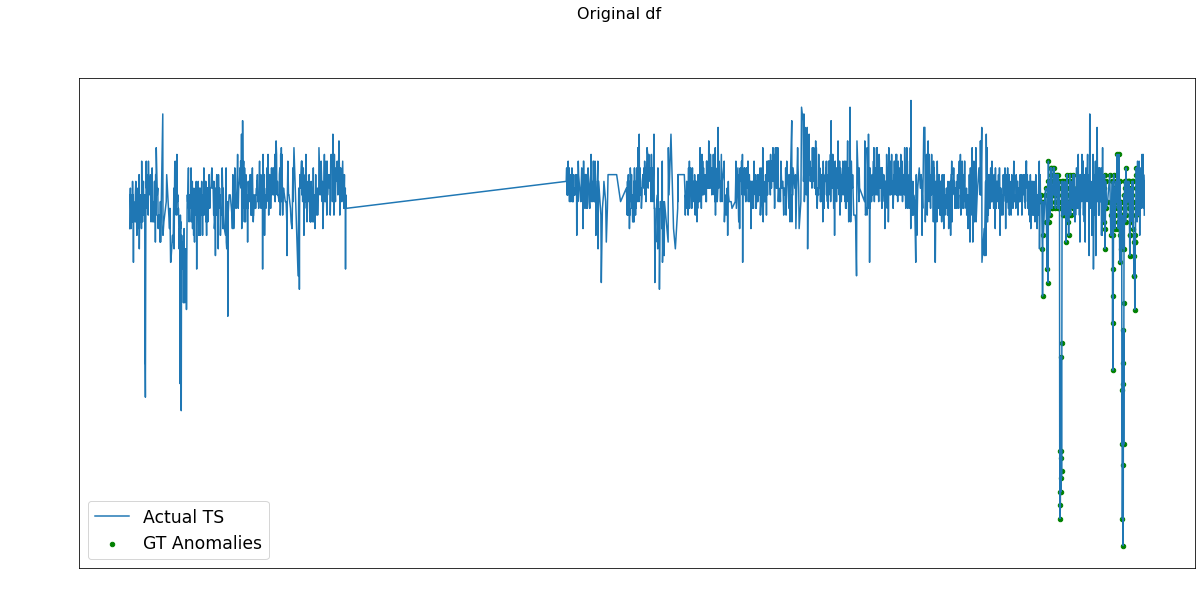

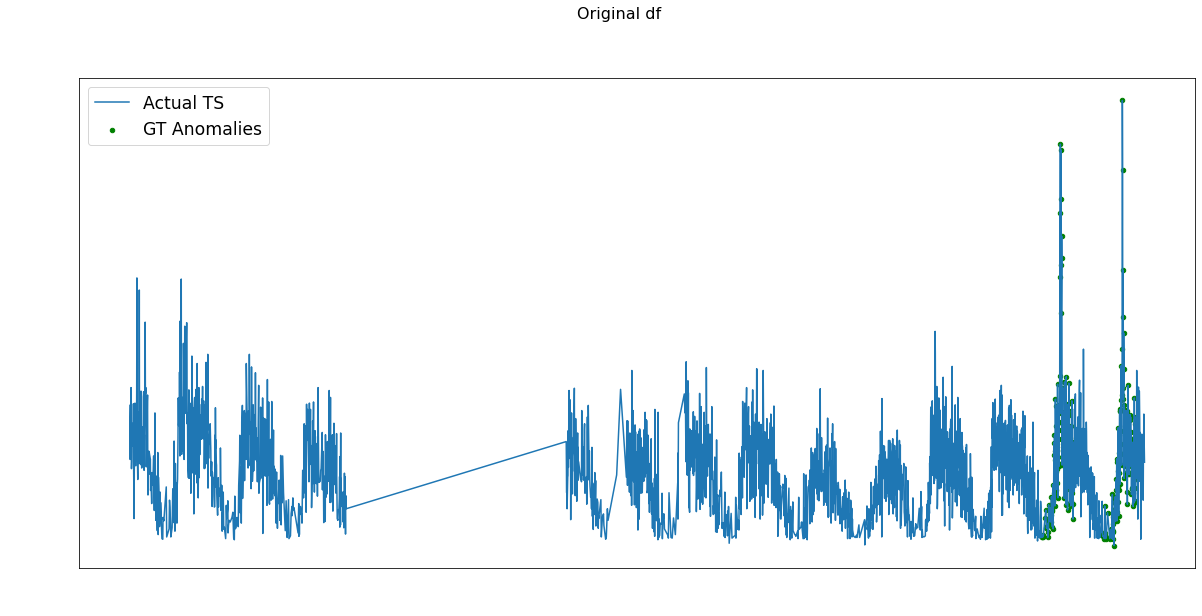

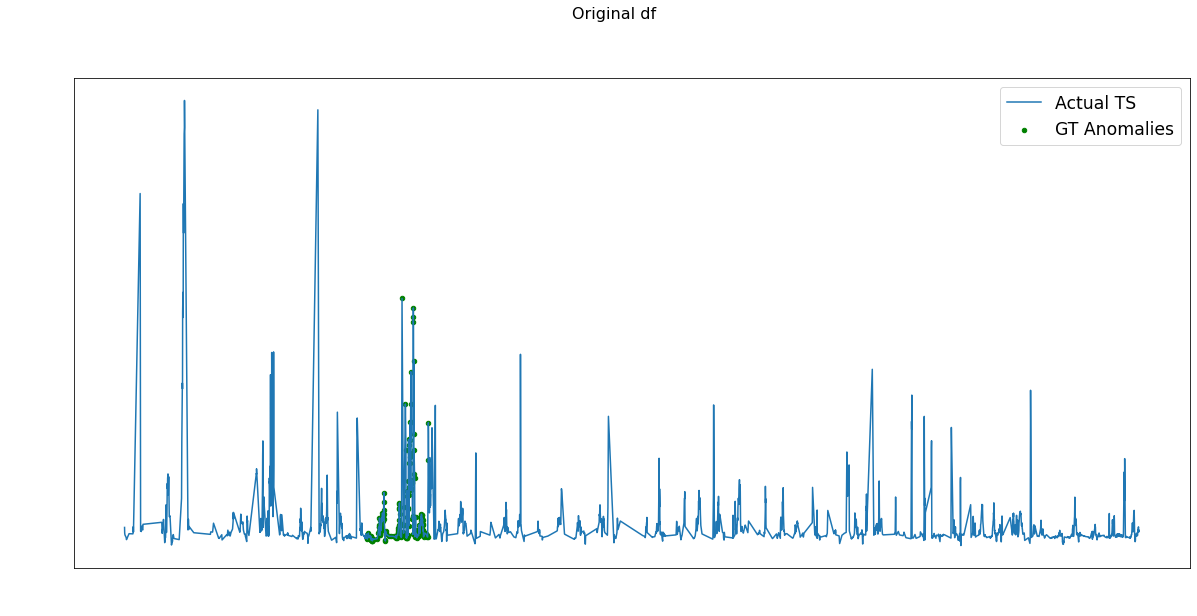

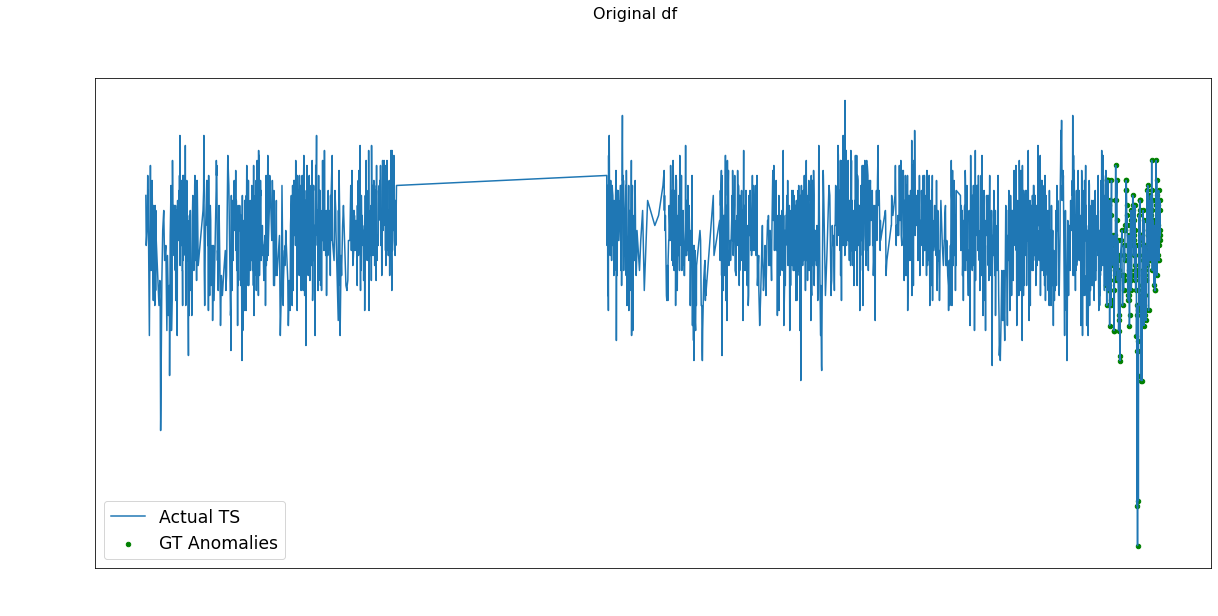

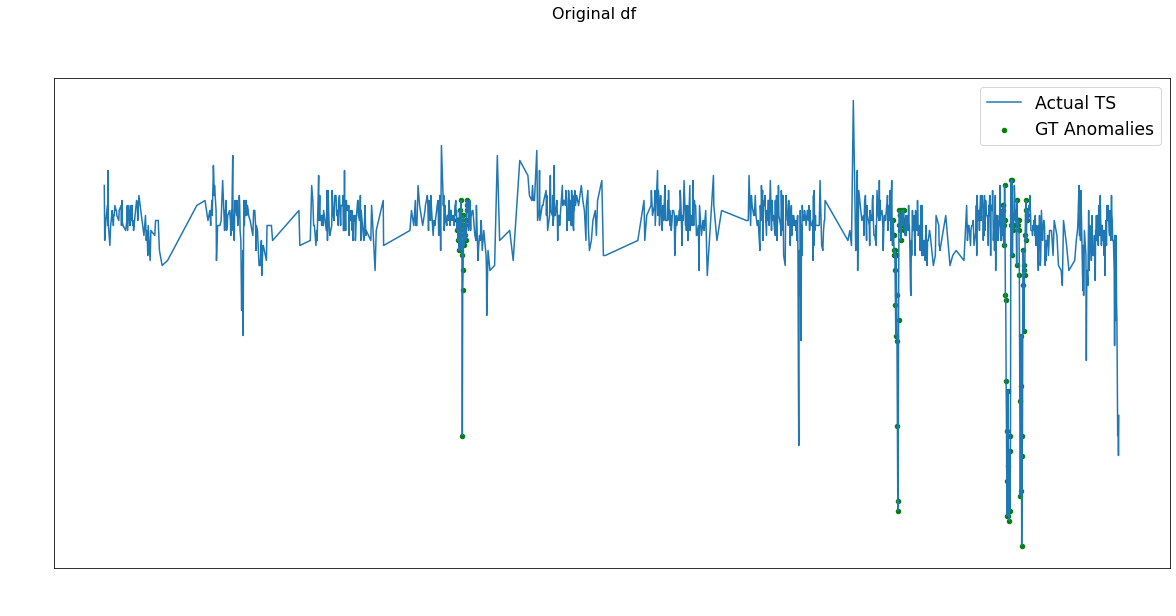

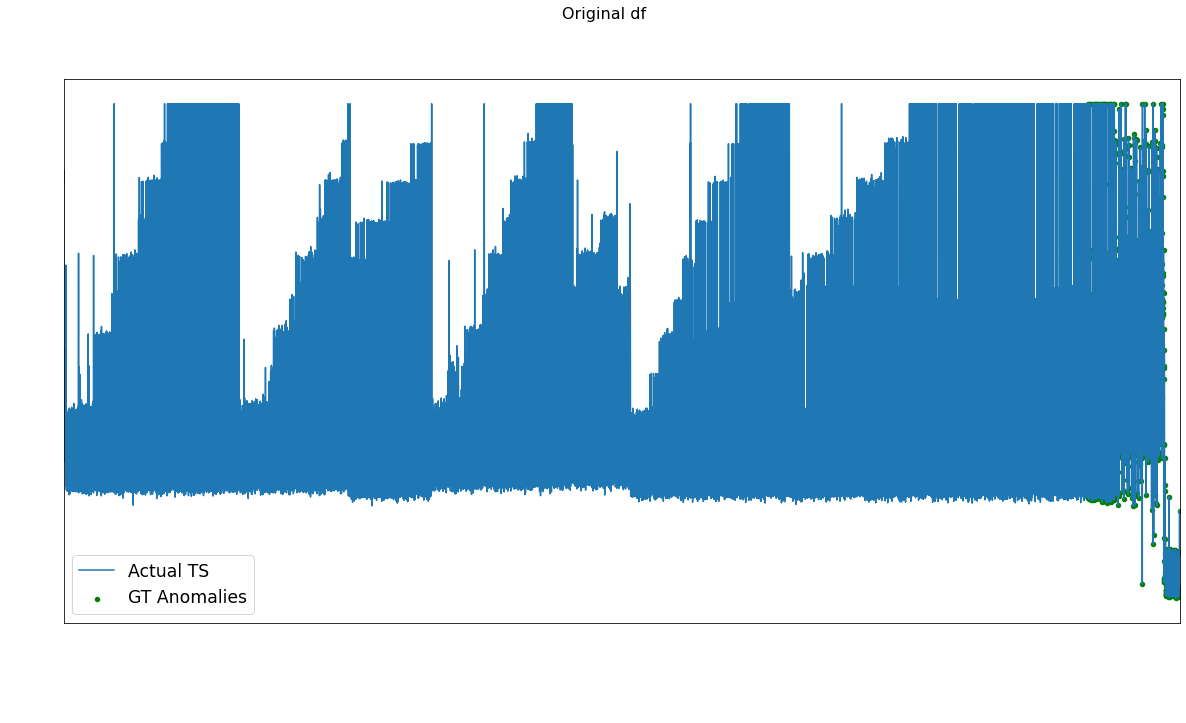

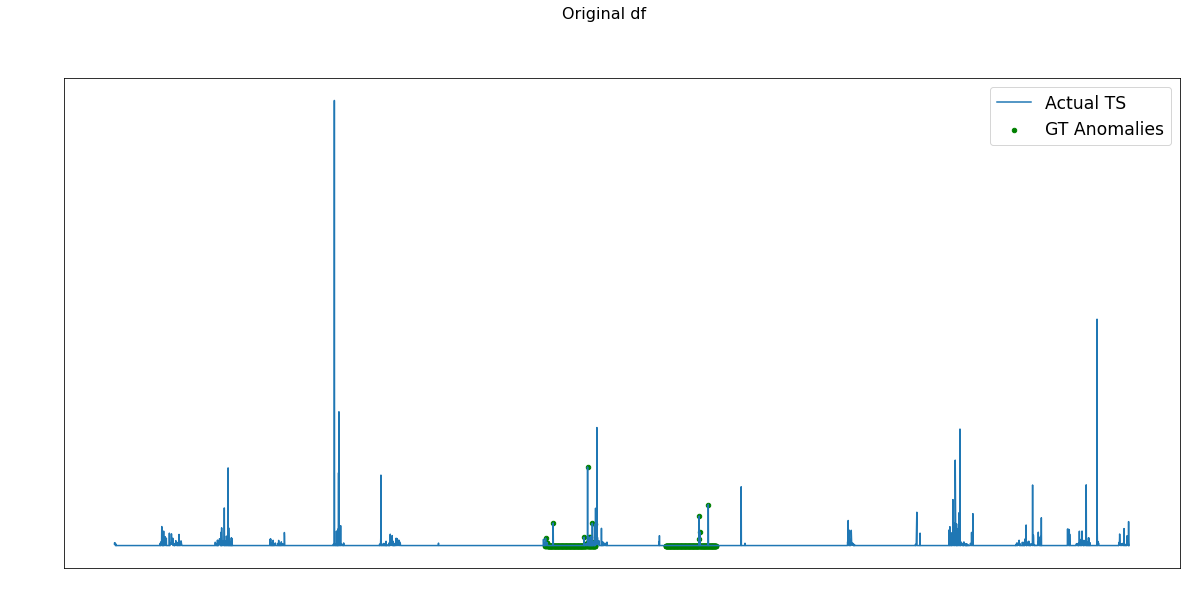

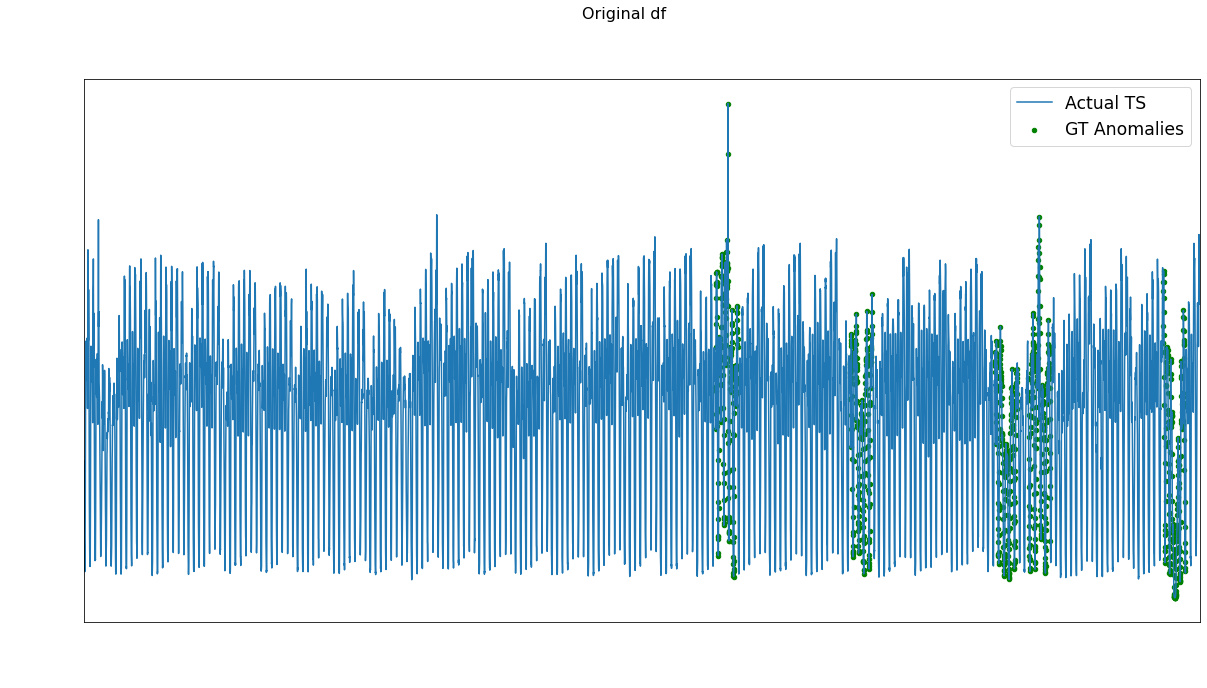

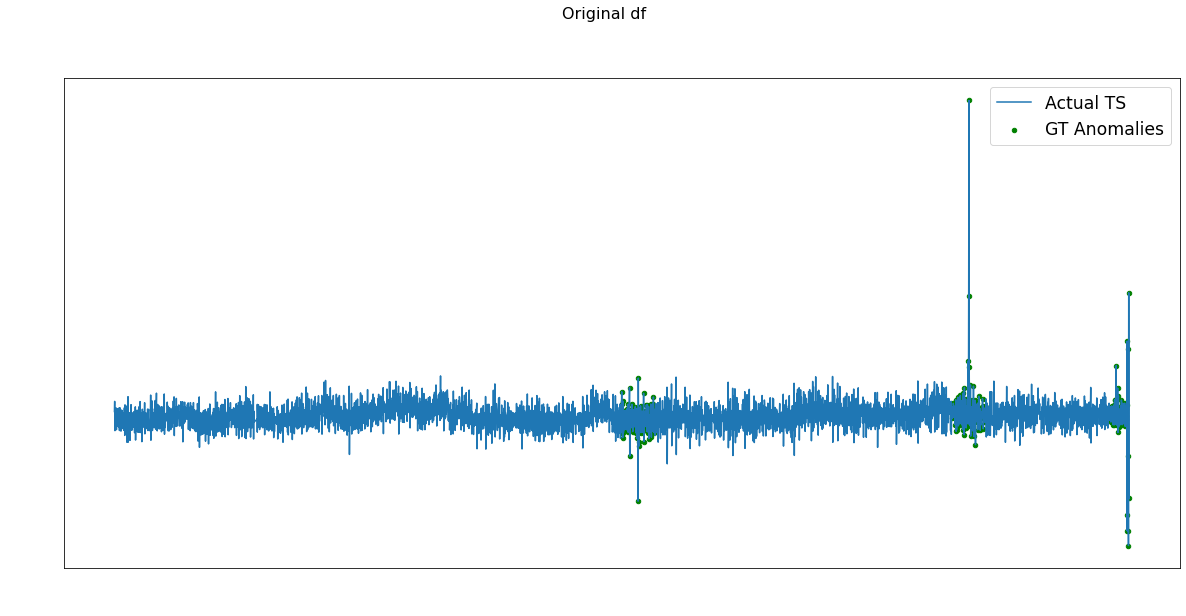

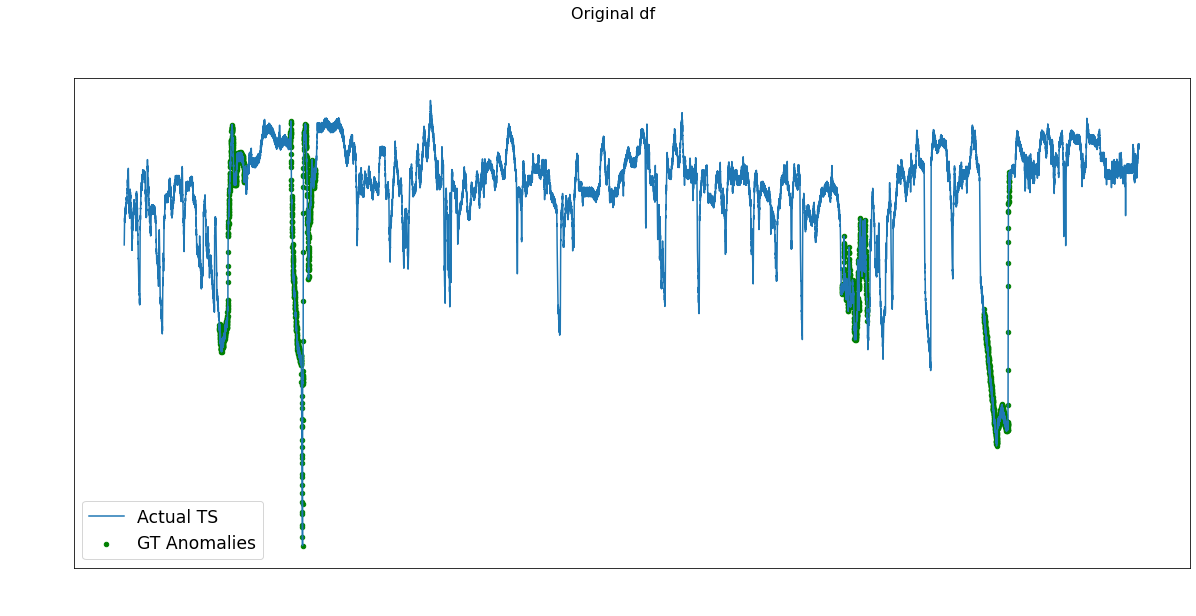

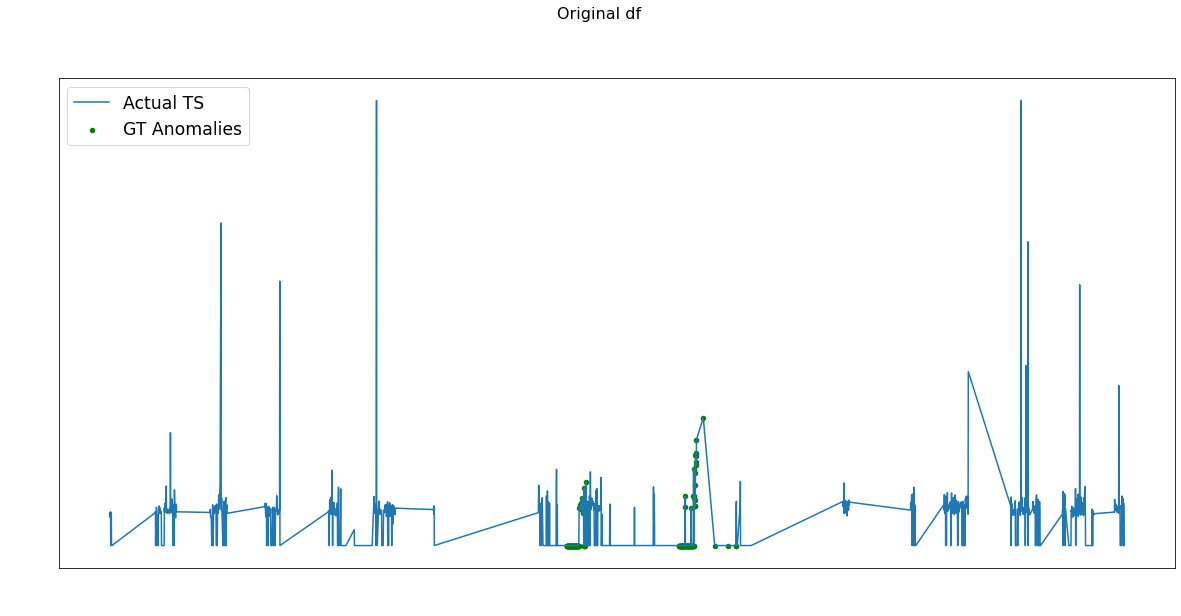

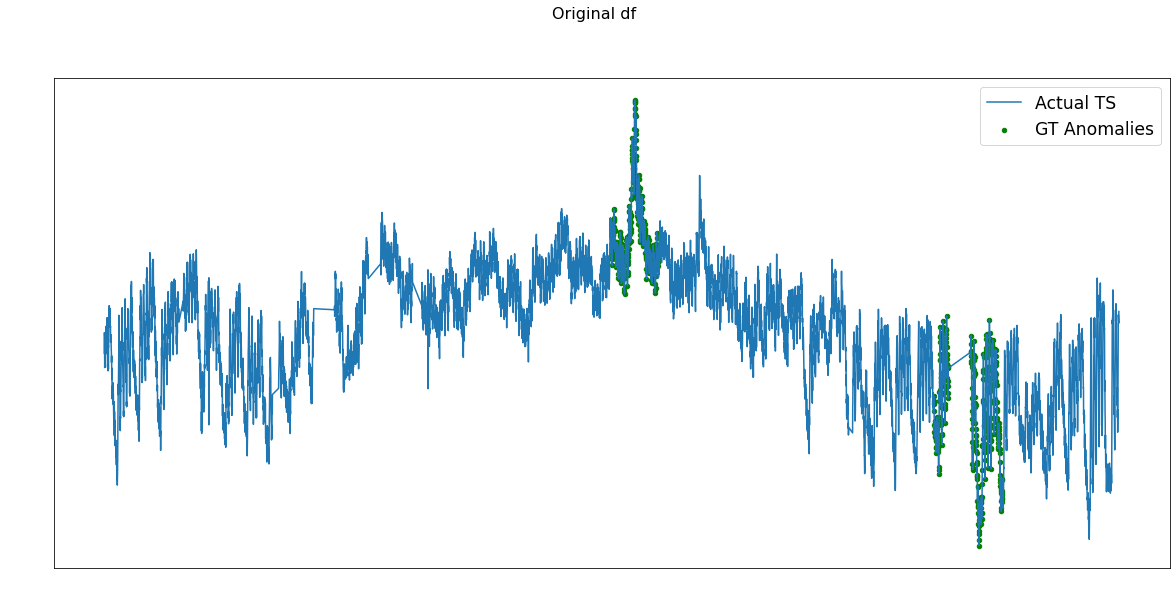

In [12]:
import importlib
import json
import os
import shutil
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from kad.visualization import visualization
from kad.kad_utils import kad_utils
from kad.ts_analyzer import ts_analyzer
visualization = importlib.reload(visualization)

kad_utils.customize_matplotlib()

X_LABEL = "timestamp"
data_dir = "data/archive/"
file_dir = "artificialWithAnomaly"

for (dirpath, dirnames, filenames) in os.walk(data_dir):
    for filename in filenames:
        if filename.endswith(".csv"):
            plots_dir = os.path.join(dirpath, "plots")
            try:
                os.mkdir(plots_dir)
            except Exception as e:
                print(e)
            file_path = os.path.join(dirpath, filename)

            print(file_path)

            original_df = pd.read_csv(
                file_path, parse_dates=True, index_col="timestamp"
            )

            with open("data/archive/combined_windows.json") as f:
                true_anomalies = json.load(f)

            ts_analyzer = importlib.reload(ts_analyzer)

            true_anomalies_ranges = true_anomalies[os.path.join(dirpath.split("/")[-1], filename)]

            ground_true_anomalies_df = pd.DataFrame()
            for anom_range in true_anomalies_ranges:
                ground_true_anomalies_df = ground_true_anomalies_df.append(original_df.loc[anom_range[0]:anom_range[1]])

            preprocessed_df = original_df.copy()
            preprocessed_df["gt_is_anomaly"] = [idx in ground_true_anomalies_df.index  for idx in original_df.index.tolist()]

            fig = visualization.visualize(results_df=preprocessed_df, metric_name="value", title="Original df")

            fig_filepath = os.path.join(plots_dir, filename.split(".")[0])
            plt.savefig(fig_filepath)
            # fig.show()